# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-файла" data-toc-modified-id="Изучение-общей-информации-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-в-столбе-ceiling_height" data-toc-modified-id="Обработка-пропусков-в-столбе-ceiling_height-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков в столбе ceiling_height</a></span></li><li><span><a href="#Обработка-пропусков-в-столбах-living_area-и-kitchen_area" data-toc-modified-id="Обработка-пропусков-в-столбах-living_area-и-kitchen_area-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков в столбах living_area и kitchen_area</a></span></li><li><span><a href="#Обработка-пропусков-в-столбе-is_apartment" data-toc-modified-id="Обработка-пропусков-в-столбе-is_apartment-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропусков в столбе is_apartment</a></span></li><li><span><a href="#Обработка-пропусков-в-столбе-balcony" data-toc-modified-id="Обработка-пропусков-в-столбе-balcony-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка пропусков в столбе balcony</a></span></li><li><span><a href="#Обработка-пропусков-в-столбе-floors_total-и-locality_name" data-toc-modified-id="Обработка-пропусков-в-столбе-floors_total-и-locality_name-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка пропусков в столбе floors_total и locality_name</a></span></li><li><span><a href="#Обработка-неявных-дубликатов-в-столбе-locality_name" data-toc-modified-id="Обработка-неявных-дубликатов-в-столбе-locality_name-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Обработка неявных дубликатов в столбе locality_name</a></span></li><li><span><a href="#Обработка-пропусков-в-столбе-airports_nearest" data-toc-modified-id="Обработка-пропусков-в-столбе-airports_nearest-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Обработка пропусков в столбе airports_nearest</a></span></li><li><span><a href="#Обработка-пропусков-в-столбе-days_exposition" data-toc-modified-id="Обработка-пропусков-в-столбе-days_exposition-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Обработка пропусков в столбе days_exposition</a></span></li><li><span><a href="#Преобразование-типа-данных-в-столбцах-last_price,-floors_total,-balcony,-days_exposition,-first_day_exposition,-is_apartment" data-toc-modified-id="Преобразование-типа-данных-в-столбцах-last_price,-floors_total,-balcony,-days_exposition,-first_day_exposition,-is_apartment-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Преобразование типа данных в столбцах last_price, floors_total, balcony, days_exposition, first_day_exposition, is_apartment</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.9.1"><span class="toc-item-num">2.9.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-объектов-недвижимости" data-toc-modified-id="Изучение-параметров-объектов-недвижимости-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров объектов недвижимости</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь" data-toc-modified-id="Общая-площадь-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая площадь</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Цена-объекта" data-toc-modified-id="Цена-объекта-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Цена объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Общее-количество-этажей-в-доме" data-toc-modified-id="Общее-количество-этажей-в-доме-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Общее количество этажей в доме</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-метрах" data-toc-modified-id="Расстояние-до-центра-города-в-метрах-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Расстояние до центра города в метрах</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#Как-быстро-продавались-квартиры" data-toc-modified-id="Как-быстро-продавались-квартиры-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>Как быстро продавались квартиры</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Факторы,-влияющие-на-общую-(полную)-стоимость-объекта-недвижимости" data-toc-modified-id="Факторы,-влияющие-на-общую-(полную)-стоимость-объекта-недвижимости-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Факторы, влияющие на общую (полную) стоимость объекта недвижимости</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Cредняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Cредняя-цена-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Изучение общей информации файла

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Чтение файла
df = pd.read_csv('###', sep = '\t')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 50) #  Вывод всех столбцов файла

In [3]:
# Информация о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Первые 10 строк файла
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


In [5]:
# Количество пропусков
display(df.isna().sum())
# Процент пропусков
df.isna().mean()*100

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

In [6]:
# Количество явных дубликатов
df.duplicated().sum()

0

In [7]:
# Описательные данные файла
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


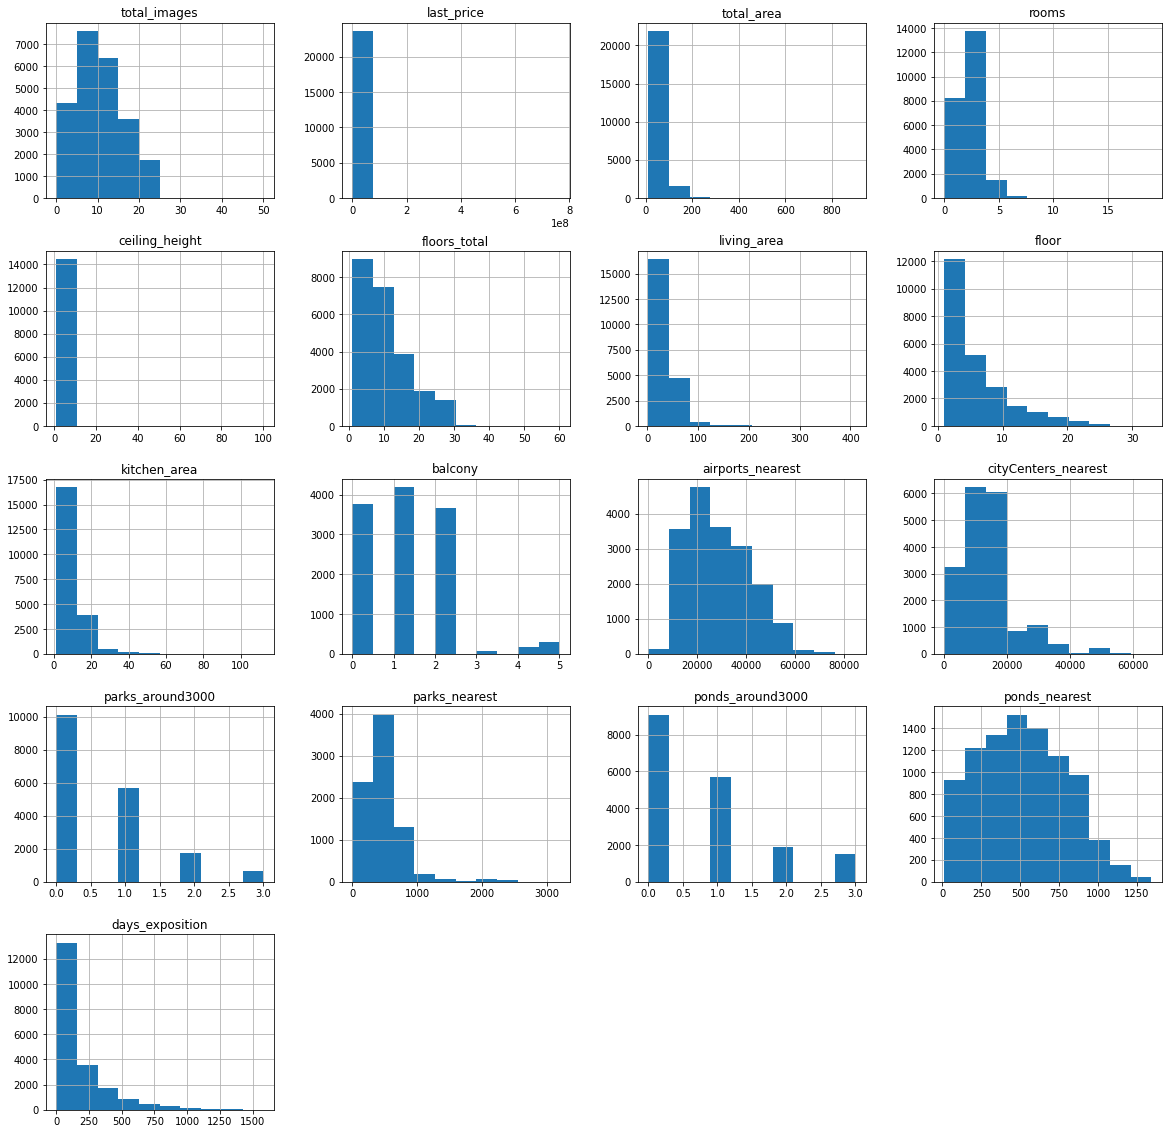

In [8]:
df.hist(figsize=(20, 20));

**Выводы:**
1. Некоторые столбцы имеют неправильный тип данных: last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition переведем в int64; first_day_exposition переведем в datetime, is_apartment в bool.
2. В файле содержится большое количество пропусков, например в столбце is_apartment 20924 пропусков из 23699 строк.
3. Из полученных описательных данных мы видим, что в файле содержатся аномальные значения:
- в ceiling_height минимальная высота потолка 1 м, максимальная 100 м;
- в last_price минимальная стоимость 12,190, максимальная 763,000,000;
- в total_area минимальная площадь 12 м2, максимальная 900 м2;
- в floors_total максимальная этажность дома 60, в Санкт-Петербурге нет таких высоких жилых домов;
- в df living_area' жилая минимальная площадь 2 м;
4. Явных дубликатов в файле не содержится.

### Предобработка данных

#### Обработка пропусков в столбе ceiling_height

In [9]:
# Информация по столбцу ceiling_height
df['ceiling_height'].describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [10]:
# Посмотрим уникальные значения высоты потолков
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В столбец с высотой потолков ceiling_height: минимальная высота потолков 1 метр, максимальная - 100 метров. Явно ошибка.
Можно заметить, что встречаются также потолки размером 20-30 метров. Что тоже аномалия. Логично предположить, что на самом деле это вещественные значения: 2-3 метра. Следовательно нужно поделить такие значения на 10.

In [11]:
# Для значений больше 20 применим деление на 10
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10

В России действует СНиП, который регулирует минимальные стандарты для высоты потолков в жилых квартирах. В соответствии с этим стандартом, минимальная высота потолков в жилых комнатах должна быть не менее 2,5 метра.

In [12]:
# Посмотрим количество квартир с потолками ниже 2,5 и выше 4м
print('Количество квартир с потолками ниже 2.5 м:', len(df[df['ceiling_height'] < 2.5].sort_values('ceiling_height')))
print('Количество квартир с потолками выше 4 м:',len(df[df['ceiling_height'] > 4].sort_values('ceiling_height')))

Количество квартир с потолками ниже 2.5 м: 76
Количество квартир с потолками выше 4 м: 53


In [13]:
# Оставим строки с высотой потолков от 2,5 до 4 метров
df = df.query('ceiling_height != ceiling_height | 2.5 <= ceiling_height <= 4')
# Проверка
df['ceiling_height'].describe()

count   14,375.00
mean         2.72
std          0.26
min          2.50
25%          2.52
50%          2.65
75%          2.80
max          4.00
Name: ceiling_height, dtype: float64

Информация о высоте потолков отсутствует по 38,8% квартирам. Посмотрим среднее и медиану высоты потолков по населенным пунктам.

In [14]:
# Средняя и медиану высоты потолков по населенным пунктам
df.pivot_table(index='locality_name', values='ceiling_height', aggfunc=['mean', 'median', 'min', 'max']).head(20)

,mean,median,min,max
,ceiling_height,ceiling_height,ceiling_height,ceiling_height
locality_name,,,,
Бокситогорск,2.80,2.80,2.80,2.80
Волосово,2.53,2.50,2.50,2.60
Волхов,2.66,2.58,2.50,3.20
Всеволожск,2.67,2.70,2.50,4.00
Выборг,2.73,2.55,2.50,4.00
Высоцк,2.50,2.50,2.50,2.50
Гатчина,2.63,2.55,2.50,4.00
Зеленогорск,2.65,2.55,2.50,3.30


Средняя и медиана высоты потолков имеет разные значения в разных населенных пунктах. Заполним пропуски в ceiling_height медианой высоты потолков по каждому населенному пункту.

In [15]:
# Группируем по населенным пунктам и вычисляем медиану высоты потолков 
median_heights = df.groupby('locality_name')['ceiling_height'].transform('median')

# Заполняем пропуски
df['ceiling_height'] = df['ceiling_height'].fillna(median_heights)

# Проверяем, сколько пропусков осталось
display(df['ceiling_height'].isna().sum())

# Посмотрим количество населенных пунктов, по которым нет высоты потолков
len(df[df['ceiling_height'].isna()]['locality_name'].unique())

156

82

In [16]:
# посмотрим распределение оставшихся пропусков в ceiling_height по населенным пунктам
display(df[df['ceiling_height'].isna()]['locality_name'].value_counts())

# удалим оставшиеся пропуски
df = df.dropna(subset=['ceiling_height'])

# проверка пропусков
len(df[df['ceiling_height'].isna()])

поселок Кобринское                       6
поселок Селезнёво                        5
поселок городского типа Токсово          4
посёлок Усть-Луга                        4
деревня Аро                              3
                                        ..
поселок городского типа Большая Ижора    1
деревня Трубников Бор                    1
деревня Чудской Бор                      1
поселок Пчевжа                           1
деревня Пчева                            1
Name: locality_name, Length: 81, dtype: int64

0

Мы исключили из выборки 82 населенных пункта без данных о высоте потолков, т.к. по ним представленны данные от 1 до 6 квартир, исключение которых не критично для исследования. 

#### Обработка пропусков в столбах living_area и kitchen_area

Посмотрим распределение доли площади кухни от общей площади квартир.

In [17]:
df_area = df.groupby('rooms')['total_area', 'kitchen_area'].median()
df_area['ratio'] = df_area['kitchen_area'] / df_area['total_area']
df_area

/tmp/ipykernel_89/1127902737.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_area = df.groupby('rooms')['total_area', 'kitchen_area'].median()


,total_area,kitchen_area,ratio
rooms,,,
0,26.02,NaN,NaN
1,36.60,9.10,0.25
2,53.00,8.80,0.17
3,73.00,9.50,0.13
4,99.60,11.20,0.11
5,145.00,15.00,0.10
6,184.00,19.30,0.10
7,213.00,19.75,0.09
8,235.70,25.00,0.11


По каждому типу квартир доля площади кухни имеет свое значение, в квартирах без отдельных комнат отсутствует площадь кухни.

Посмотрим есть ли в выборке некорректно заполненные данные о площадях квартир. Сумма площади кухни и жилой площади должны быть меньше общей площади с учетом отведения условных 10% на площадь коридоров, сан.узлов, балконов.

In [18]:
len(df.query('total_area*0.9 <= (living_area + kitchen_area)'))

463

Удалим данные строки из выборки.

In [19]:
# Создание выборки строк с пропусками
#missing_values_df = df[df[['living_area', 'kitchen_area']].isnull().any(axis=1)]
missing_values_df = df.query('living_area != living_area | kitchen_area != kitchen_area')

# Выборка строк без пропусков
df_clean = df.dropna(subset=['living_area', 'kitchen_area'], how='any')

# Фильтрация строк без пропусков по условию
df_filtered = df_clean.query('total_area * 0.9 > (living_area + kitchen_area)')
df_filtered = df_filtered.query('total_area*0.9 > living_area')

# Объединение отфильтрованных данных
df = pd.concat([df_filtered, missing_values_df], ignore_index=True)

# Проверка
display(len(df.query('total_area*0.9 <= (living_area + kitchen_area)')))
# Подсчет оставшихся значений
len(df)

0

22951

Число квартир с жилой площадью меньше 10 м2: 24


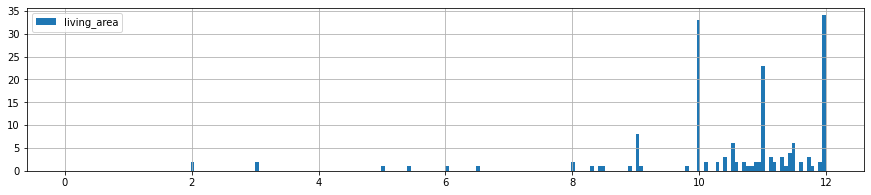

In [20]:
# Построим гистограмму числа квартир с жилой площадью меньше 10 м2
df['living_area'].hist(bins=200, range=(0, 12), figsize=(15, 3), legend=True)
print('Число квартир с жилой площадью меньше 10 м2:', len(df.query('living_area < 10')))

In [21]:
# Удалим выбросы жилой площади меньше 10 м2
df = df.query('living_area != living_area | living_area >= 10')

Число квартир с жилой площадью больше 200 м2: 25


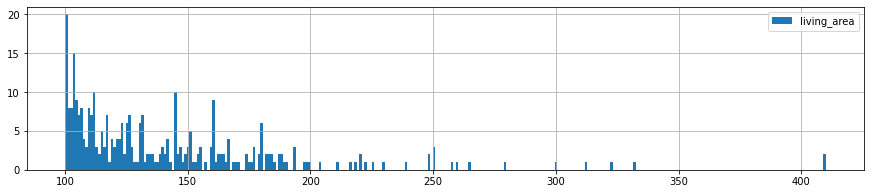

In [22]:
# Построим гистограмму числа квартир с жилой площадью больше 200 м2
df['living_area'].hist(bins=300, range=(100, 410), figsize=(15, 3), legend=True)
print('Число квартир с жилой площадью больше 200 м2:', len(df.query('living_area > 200')))

In [23]:
# Удалим выбросы жилой площади больше 200 м2
df = df.query('living_area != living_area | living_area <= 200')

Число квартир с площадью кухни меньше 4 м2: 24


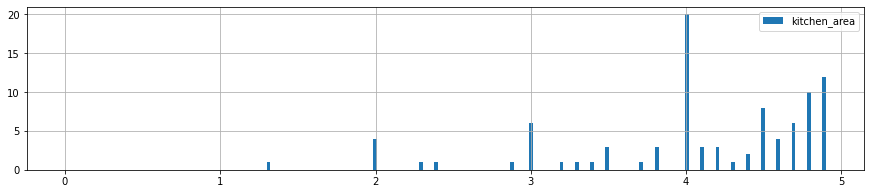

In [24]:
# Построим гистограмму числа квартир с площадью кухни меньше 4 м2
df['kitchen_area'].hist(bins=200, range=(0, 4.9), figsize=(15, 3), legend=True)
print('Число квартир с площадью кухни меньше 4 м2:', len(df.query('kitchen_area < 4')))

Число квартир с площадью кухни больше 50 м2: 30


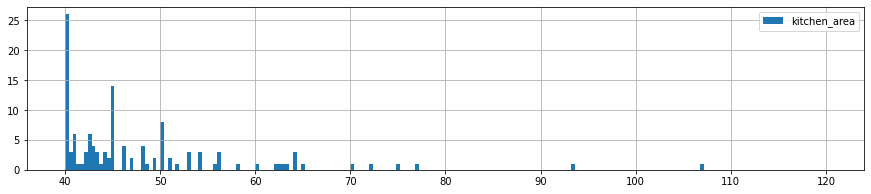

In [25]:
# Построим гистограмму числа квартир с площадью кухни больше 50 м2
df['kitchen_area'].hist(bins=200, range=(40, 120), figsize=(15, 3), legend=True)
print('Число квартир с площадью кухни больше 50 м2:', len(df.query('kitchen_area > 50')))

In [26]:
# Удалим выбросы площади кухни меньше 4 м2
df = df.query('kitchen_area != kitchen_area | 4 <= kitchen_area <= 50')

Посчитаем количество строк rooms = 0 и количество строк rooms=0 совместно с kitchen_area=NaN.

In [27]:
print('Количество строк с rooms = 0:', len(df.query('rooms == 0')))
print('Количество строк с rooms = 0 и пропусками в площади кухни:',\
      len(df.query('rooms == 0' or 'kitchen_area != kitchen_area')))

Количество строк с rooms = 0: 192
Количество строк с rooms = 0 и пропусками в площади кухни: 192


Заполним пропуски в kitchen_area данными на основе доли площади кухни от общей площади по каждой группе количества комнат в квартирах. В строках с rooms равными 0 пропуски во всех значениях kitchen_area, поэтому в сводной таблице отсутствует среднее значение, заполним эти пропуски 0. В строках, не удовлетворяющих условию total_area*0.9 <= (living_area + kitchen_area), оставим проопуски. 

In [28]:
# Рассчитать медианы для каждой категории по количеству комнат
medians = df.groupby('rooms').agg({
    'total_area': 'median',
    'kitchen_area': 'median'
}).rename(columns={
    'total_area': 'median_total_area',
    'kitchen_area': 'median_kitchen_area'
}).reset_index()

# Функция для заполнения пропусков
def fill_kitchen_area(row):
    if pd.isna(row['kitchen_area']):
        if row['rooms'] == 0:
            return 0  # Если количество комнат равно 0, заполняем kitchen_area нулем
        
        if pd.isna(row['living_area']):
            # В случае двойного пропуска (living_area и kitchen_area)
            median_row = medians[medians['rooms'] == row['rooms']]
            if not median_row.empty:
                ratio = median_row['median_kitchen_area'].values[0] / median_row['median_total_area'].values[0]
                filled_kitchen_area = row['total_area'] * ratio
                return filled_kitchen_area
        
        # Заполнение пропуска в kitchen_area на основе медиан
        median_row = medians[medians['rooms'] == row['rooms']]
        if not median_row.empty:
            ratio = median_row['median_kitchen_area'].values[0] / median_row['median_total_area'].values[0]
            filled_kitchen_area = row['total_area'] * ratio
            if row['total_area'] * 0.9 > (row['living_area'] + filled_kitchen_area):
                return filled_kitchen_area

    return row['kitchen_area']

# Применить функцию для заполнения пропусков в kitchen_area
df['kitchen_area'] = df.apply(fill_kitchen_area, axis=1)

print('Промежуточное число пропусков:', len(df[df['kitchen_area'].isna()]))
print('Уникальные значения числа комнат в оставшихся пропусках:', df[df['kitchen_area'].isna()]['rooms'].unique())

# Удалим пропуски с числом комнат больше 1
df = df.query('kitchen_area == kitchen_area | rooms <= 1')
# Оставшиеся пропуски заполним через условие total_area*0.89 - living_area
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*0.89 - df['living_area'])
# Снова удалим площади меньше 4 м2 после заполнения пропусков
df = df.query('kitchen_area == 0 | kitchen_area >= 4')

print('Финальное число пропусков:', len(df[df['kitchen_area'].isna()]))

Промежуточное число пропусков: 154
Уникальные значения числа комнат в оставшихся пропусках: [1 3 2 4 5 6]
Финальное число пропусков: 0


In [29]:
# Проверка условия total_area*0.9 <= living_area + kitchen_area
df.query('total_area*0.9 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20330,8,"2,480,000.00",27.11,2018-03-12T00:00:00,0,2.70,17.00,24.75,4,NaN,True,False,0.00,2.00,Санкт-Петербург,"38,171.00","15,015.00",0.00,NaN,2.00,982.00,64.00
21365,10,"2,350,000.00",25.00,2017-12-03T00:00:00,0,2.70,22.00,25.00,17,NaN,False,True,0.00,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.00
21471,14,"2,950,000.00",25.27,2017-11-17T00:00:00,0,2.70,25.00,25.00,11,NaN,False,True,0.00,1.00,Санкт-Петербург,"11,405.00","13,222.00",0.00,NaN,1.00,623.00,51.00
21666,0,"3,300,000.00",27.00,2017-08-15T00:00:00,0,2.70,25.00,25.00,22,NaN,False,True,0.00,NaN,Санкт-Петербург,"12,199.00","12,111.00",0.00,NaN,1.00,337.00,161.00
21690,1,"3,700,000.00",24.20,2017-11-10T00:00:00,0,2.70,19.00,24.20,13,NaN,False,True,0.00,1.00,Санкт-Петербург,"17,837.00","16,840.00",0.00,NaN,2.00,210.00,74.00


Имеем 5 квартир, не удовлетворяющих условию total_area*0.9 <= living_area + kitchen_area. Четыре из них свободной планировки и все без дополнительных комнат, поэтому оставляем данные записи в выборке. Теперь заполним пропуски в жилой площади.

In [30]:
# Функция для вычисления отношения медианы жилой площади к медиане площади квартиры
def living_to_total_median(group):
    median_living = group['living_area'].median()
    median_total = group['total_area'].median()
    return median_living / median_total

# Сгруппируем данные по количеству комнат и посчитаем отношение медиан
ratios = df.groupby('rooms').apply(living_to_total_median)

def fill_missing_living_area(row, ratios):
    if np.isnan(row['living_area']):
        predicted_living_area = row['total_area'] * ratios[row['rooms']]
        max_allowed_living_area = row['total_area'] * 0.89 - row['kitchen_area']
        return min(predicted_living_area, max_allowed_living_area) # Учитываем условие
    else:
        return row['living_area']

# Заполним пропуски в жилой площади
df['living_area'] = df.apply(fill_missing_living_area, axis=1, ratios=ratios)

In [31]:
# Повторная проверка на выявление некорректно заполненных данные о площадях квартир после заполнения пропусков
df.query('total_area*0.9 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20330,8,"2,480,000.00",27.11,2018-03-12T00:00:00,0,2.70,17.00,24.75,4,NaN,True,False,0.00,2.00,Санкт-Петербург,"38,171.00","15,015.00",0.00,NaN,2.00,982.00,64.00
21365,10,"2,350,000.00",25.00,2017-12-03T00:00:00,0,2.70,22.00,25.00,17,NaN,False,True,0.00,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.00
21471,14,"2,950,000.00",25.27,2017-11-17T00:00:00,0,2.70,25.00,25.00,11,NaN,False,True,0.00,1.00,Санкт-Петербург,"11,405.00","13,222.00",0.00,NaN,1.00,623.00,51.00
21666,0,"3,300,000.00",27.00,2017-08-15T00:00:00,0,2.70,25.00,25.00,22,NaN,False,True,0.00,NaN,Санкт-Петербург,"12,199.00","12,111.00",0.00,NaN,1.00,337.00,161.00
21690,1,"3,700,000.00",24.20,2017-11-10T00:00:00,0,2.70,19.00,24.20,13,NaN,False,True,0.00,1.00,Санкт-Петербург,"17,837.00","16,840.00",0.00,NaN,2.00,210.00,74.00


#### Обработка пропусков в столбе is_apartment

In [32]:
# Посмотрим количество аппартаментов
df['is_apartment'].value_counts()

False    2610
True       41
Name: is_apartment, dtype: int64

Аппартамент всего 41. Делаем вывод, что большинство пользователей не помечали квартиры, не являющиеся аппартаментами. Заполним пропущенные строки значением False

In [33]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

#### Обработка пропусков в столбе balcony

Данные о количестве балконов заполняются пользователями. Очевидно, часть пользователей не заполняли данный параметр при отсутствии балконов. Заменим пропуски на 0.

In [34]:
df['balcony'] = df['balcony'].fillna(0)

#### Обработка пропусков в столбе floors_total и locality_name

Информацию по пропускам этажности домов и названию населеного пункта невозможно восстановить. Количество пропусков незначительное, удалим строки с пропусками в данных столбац. 

In [35]:
df = df.dropna(subset=['floors_total', 'locality_name'])

#### Обработка неявных дубликатов в столбе locality_name

In [36]:
df.locality_name.nunique()

282

In [37]:
# Посмотрим уникальные значения названий населенных пунктов
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'деревня Старая', 'деревня Лесколово', 'село Путилово',
       'Ивангород', 'Мурино', 'Сланцы', 'Шлиссельбург', 'Сясьстрой',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'поселок Новый Свет',
       'деревня Оржицы', 

In [38]:
# Устраним неявные дубликаты
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок городского типа'], 'поселок', regex=True)
    .replace(['поселок Мурино'], 'Мурино', regex=True)
    .replace(['деревня Кудрово'], 'Кудрово', regex=True)
    .replace(['поселок при железнодорожной станции Вещево'], 'поселок станции Вещево', regex=True)
) 
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Колпино', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок Лебяжье', 'поселок Сиверский', 'поселок Молодцово',
       'поселок Кузьмоловский', 'садовое товарищество Новая Ропша',
       'Павловск', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'деревня Старая', 'деревня Лесколово',
       'село Путилово', 'Ивангород', 'Сланцы', 'Шлиссельбург',
       'Сясьстрой', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
       'поселок Романовка', 'поселок Бугры', 'поселок Рощино', 'Кириши',
       'Луга', 'Волосов

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22679 entries, 0 to 22950
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22679 non-null  int64  
 1   last_price            22679 non-null  float64
 2   total_area            22679 non-null  float64
 3   first_day_exposition  22679 non-null  object 
 4   rooms                 22679 non-null  int64  
 5   ceiling_height        22679 non-null  float64
 6   floors_total          22679 non-null  float64
 7   living_area           22679 non-null  float64
 8   floor                 22679 non-null  int64  
 9   is_apartment          22679 non-null  bool   
 10  studio                22679 non-null  bool   
 11  open_plan             22679 non-null  bool   
 12  kitchen_area          22679 non-null  float64
 13  balcony               22679 non-null  float64
 14  locality_name         22679 non-null  object 
 15  airports_nearest   

#### Обработка пропусков в столбе airports_nearest

В Санкт-Петербурге один аэропорт "Пулково". Попробуем заполнить пропуски средними значениями расстояний до Пулково по населенным пунктам.

In [40]:
# Посмотрим количество населенных пунктов
len(df['locality_name'].unique())

249

In [41]:
# Посмотрим количество населенных пунктов, по которым хотя бы частично внесено расстояние до аэропорта
df[df['airports_nearest'].notnull()]['locality_name'].nunique()

21

In [42]:
# Посмотрим количество населенных пунктов, по которым имеются пропуски расстояния до аэропорта
df[df['airports_nearest'].isna()]['locality_name'].nunique()

234

Данные о расстоянии до аэропорта внесены по 21 населенному пункту из 249, следовательно из 234 населенных пунтов с пропусками мы сможем заполнить средним значанением пропуски по 6 населенным пунктам. В оставшихся 228 населенных пунктах полностью отсутствуют данные о расстоянии до аэропорта. Т.к. данная информация получается автоматически из картографических данных, очевидно сервис Яндекс Недвижимость столкнулся с технической проблемой расчета расстояния до аэропорта по конкретным населенным пунктам. Проверим догадку, что автоматические данные по parks_around3000, ponds_around3000, cityCenters_nearest не занесены по тем же населенным пункам, что и в airports_nearest.

In [43]:
# Выведем список населенных пунктов, по которым хотя бы частично внесено расстояние до аэропорта airports_nearest
df[df['airports_nearest'].notnull()]['locality_name'].value_counts()

Санкт-Петербург            15045
поселок Шушары               431
Пушкин                       354
Колпино                      332
поселок Парголово            323
Петергоф                     198
Сестрорецк                   178
Красное Село                 170
Ломоносов                    131
Кронштадт                     92
поселок Металлострой          64
поселок Стрельна              41
Павловск                      38
Зеленогорск                   24
поселок Понтонный             20
поселок Саперный               6
поселок Молодежное             5
поселок Песочный               4
поселок Репино                 4
поселок Лисий Нос              3
поселок Александровская        2
Name: locality_name, dtype: int64

In [44]:
# Выведем список населенных пунктов, по которым хотя бы частично внесено расстояния airports_nearest, 
# parks_around3000, ponds_around3000, cityCenters_nearest
df[(df['airports_nearest'].notnull()) & (df['cityCenters_nearest'].notnull()) \
   & (df['parks_around3000'].notnull()) & (df['ponds_around3000'].notnull())]['locality_name'].value_counts()

Санкт-Петербург            15045
поселок Шушары               431
Пушкин                       353
Колпино                      332
поселок Парголово            323
Петергоф                     198
Сестрорецк                   178
Красное Село                 170
Ломоносов                    131
Кронштадт                     92
поселок Металлострой          64
поселок Стрельна              41
Павловск                      38
Зеленогорск                   24
поселок Понтонный             20
поселок Саперный               6
поселок Молодежное             5
поселок Песочный               4
поселок Репино                 4
поселок Лисий Нос              3
поселок Александровская        2
Name: locality_name, dtype: int64

Догадка подтвердилась, сервис Яндекс Недвижимость не прогрузил все автоматические данные на основе картографических данных по конкретным населенным пунктам. Кроме того, пропуски в parks_around3000, ponds_around3000, cityCenters_nearest, parks_nearest, ponds_nearest невозможно заполнить, т.к. мы не можем рассмотреть данные в этих столбцах относительно одного объекта. Пропуски в airports_nearest попробуем заполнить на основе имеющихся расстояний от населенных пунктов до единственного аэропорта Пулково.

In [45]:
# Посмотрим среднее и медиану расстояний от населенных пунктов до аэропорта
df.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['mean', 'median', 'min', 'max'])

,mean,median,min,max
,airports_nearest,airports_nearest,airports_nearest,airports_nearest
locality_name,,,,
Зеленогорск,"73,300.25","72,282.00","70,016.00","81,607.00"
Колпино,"26,382.67","26,244.50","23,649.00","31,691.00"
Красное Село,"26,646.28","25,857.50","23,892.00","38,367.00"
Кронштадт,"67,473.18","67,847.00","64,931.00","69,785.00"
Ломоносов,"48,311.07","48,425.00","46,502.00","56,896.00"
Павловск,"21,053.34","20,529.50","19,380.00","24,291.00"
Петергоф,"40,196.90","39,242.50","34,626.00","46,535.00"
Пушкин,"16,464.19","15,805.00","12,157.00","21,055.00"


In [46]:
#Заполним пропуски в airports_nearest средним растоянием до аэропорта по каждому населенному пункту 

# перебираем названия населенных пунктов в наборе уникальных значений столба locality_name
for name in df['locality_name'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в locality_name текущее название населенного пункта (name) и есть пропуски в airports_nearest
    df.loc[(df['locality_name'] == name) & (df['airports_nearest'].isna()), 'airports_nearest'] = \
    df.loc[(df['locality_name'] == name), 'airports_nearest'].mean()
    # и записываем в них среднее значение airports_nearest среди строк с текущим названием населенного пункта (name)

# Проверяем, сколько пропусков осталось
display(df['airports_nearest'].isna().sum())

# Посмотрим количество населенных пунктов, по которым имеются пропуски расстояния до аэропорта
df[df['airports_nearest'].isna()]['locality_name'].nunique()

5129

228

Заполнение пропусков airports_nearest произведено только по 6 населенным пунктам, по остальным во всех объявлениях отсутствует информация о расстоянии до аэропорта. Оставим данные пропуски.

#### Обработка пропусков в столбе days_exposition

Столбец days_exposition содержит информацию о количестве дней размещения объявления. Логично предположить, что пропущенных значений в данном столбце быть не дожно, так как данное значение расчитывается автоматически, следовательно, пропущенное значение 'NaN' означает то, что объявление всё ещё актуально и квартира ещё продаётся. Данные пропуски составляют 7,4% всего файла, заполним данные пропуски меткой 0 для изменения типа данных столбца в int.

In [47]:
df['days_exposition'] = df['days_exposition'].fillna(0)

In [48]:
# Проверяем количество оставшихся пропусков в файле
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5129
cityCenters_nearest      5194
parks_around3000         5193
parks_nearest           14955
ponds_around3000         5193
ponds_nearest           13969
days_exposition             0
dtype: int64

#### Преобразование типа данных в столбцах last_price, floors_total, balcony, days_exposition, first_day_exposition, is_apartment

In [49]:
df = \
df.astype({'last_price': int, 'floors_total': int, 'balcony': int, 'days_exposition': int, 'is_apartment': bool})

Столбец "first_day_exposition" переведем в формат даты без времени, т.к. время не указано.

In [50]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

# Проверим измененные типы данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22679 entries, 0 to 22950
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22679 non-null  int64         
 1   last_price            22679 non-null  int64         
 2   total_area            22679 non-null  float64       
 3   first_day_exposition  22679 non-null  datetime64[ns]
 4   rooms                 22679 non-null  int64         
 5   ceiling_height        22679 non-null  float64       
 6   floors_total          22679 non-null  int64         
 7   living_area           22679 non-null  float64       
 8   floor                 22679 non-null  int64         
 9   is_apartment          22679 non-null  bool          
 10  studio                22679 non-null  bool          
 11  open_plan             22679 non-null  bool          
 12  kitchen_area          22679 non-null  float64       
 13  balcony         

##### Вывод
сделали предобработку данных, а именно:
- изменили типы данных,
- обработали явные и неявные дубликаты,
- также обработали пропуски.

### Добавление новых столбцов

**Произведем расчет данных и добавим их в таблицу для дальнейшего исследования**

- price_one_square_meter: цена одного квадратного метра;
- exposition_weekday: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- exposition_month: месяц публикации объявления;
- exposition_year: год публикации объявления;
- floor_category: тип этажа квартиры (значения — «первый», «последний», «другой»);
- city_centers_nearest_km: расстояние до центра города в километрах (км).

In [51]:
# Добавим столбец с ценой за 1м2 и округлим полученную цену до копеек
df['price_one_square_meter'] = df['last_price'] / df['total_area']

# Добавим столбец с днем недели публикации объявления
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
df['exposition_month'] = df['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
df['exposition_year'] = df['first_day_exposition'].dt.year

# Функция для категоризации этажности в доме
def get_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
# Добавляем столбец с категорией этажа квартиры
df['floor_type'] = df.apply(get_floor_type, axis=1)

# Добавим столбец city_centers_nearest_km
df['city_centers_nearest_km'] = round(df['cityCenters_nearest'] / 1000)

# Проверим таблицу
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
8190,8,7700000,67.00,2017-05-03,2,2.60,4,39.00,2,False,False,False,15.00,0,Пушкин,"12,489.00","24,643.00",1.00,690.00,0.00,NaN,47,"114,925.37",2,5,2017,другой,25.00
8004,9,5650000,42.00,2017-02-16,2,2.70,5,28.00,4,False,False,False,5.40,0,Санкт-Петербург,"39,812.00","9,072.00",2.00,378.00,0.00,NaN,88,"134,523.81",3,2,2017,другой,9.00
9409,12,4700000,37.00,2015-03-24,1,2.70,25,16.00,16,False,False,False,10.50,0,Санкт-Петербург,"46,530.00","15,541.00",0.00,NaN,0.00,NaN,630,"127,027.03",1,3,2015,другой,16.00
4141,20,6690000,50.80,2017-04-10,2,2.70,16,20.80,10,False,False,False,11.80,2,Санкт-Петербург,"14,773.00","13,313.00",0.00,NaN,0.00,NaN,60,"131,692.91",0,4,2017,другой,13.00
17427,8,4300000,40.00,2018-03-26,1,2.70,23,18.00,3,False,False,False,10.00,0,Санкт-Петербург,"15,297.00","13,279.00",0.00,NaN,1.00,"1,112.00",75,"107,500.00",0,3,2018,другой,13.00
14988,11,2400000,45.20,2018-11-26,2,2.60,5,27.70,4,False,False,False,5.40,0,поселок Вырица,NaN,NaN,NaN,NaN,NaN,NaN,85,"53,097.35",0,11,2018,другой,NaN
2685,17,7130000,51.00,2018-06-13,2,2.50,17,29.50,13,False,False,False,8.20,0,Санкт-Петербург,"33,564.00","14,616.00",0.00,NaN,1.00,859.00,0,"139,803.92",2,6,2018,другой,15.00
7159,10,4500000,46.00,2017-04-14,1,2.70,12,20.00,7,False,False,False,10.00,4,Санкт-Петербург,"28,583.00","11,537.00",0.00,NaN,1.00,656.00,232,"97,826.09",4,4,2017,другой,12.00
22682,15,5500000,69.10,2018-02-12,2,2.78,21,39.63,19,False,False,False,13.00,1,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,140,"79,594.79",0,2,2018,другой,NaN
19196,12,25000000,196.00,2016-11-04,7,3.50,6,145.00,5,False,False,False,17.00,1,Санкт-Петербург,"25,083.00","3,658.00",1.00,552.00,0.00,NaN,0,"127,551.02",4,11,2016,другой,4.00


### Исследовательский анализ данных

#### Изучение параметров объектов недвижимости

In [52]:
# Выведем описательные данные файла
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,city_centers_nearest_km
count,"22,679.00","22,679.00","22,679.00","22,679.00","22,679.00","22,679.00","22,679.00","22,679.00","22,679.00","22,679.00","17,550.00","17,485.00","17,486.00","7,724.00","17,486.00","8,710.00","22,679.00","22,679.00","22,679.00","22,679.00","22,679.00","17,485.00"
mean,9.87,"6,295,575.20",59.65,2.06,2.70,10.75,33.99,5.91,10.21,0.59,"28,846.51","14,285.74",0.60,491.09,0.76,518.95,156.69,"98,858.88",2.57,6.40,"2,017.37",14.28
std,5.68,"7,803,864.66",31.87,1.05,0.20,6.58,20.39,4.87,5.09,0.96,"12,657.81","8,612.07",0.80,342.04,0.93,277.90,213.88,"46,227.70",1.79,3.49,1.04,8.62
min,0.00,"12,190.00",15.50,0.00,2.50,1.00,8.25,1.00,0.00,0.00,0.00,181.00,0.00,1.00,0.00,13.00,0.00,111.83,0.00,1.00,"2,014.00",0.00
25%,6.00,"3,450,000.00",40.00,1.00,2.55,5.00,18.60,2.00,7.00,0.00,"18,546.50","9,416.00",0.00,288.00,0.00,295.00,22.00,"76,923.08",1.00,3.00,"2,017.00",9.00
50%,9.00,"4,650,000.00",52.00,2.00,2.70,9.00,30.00,4.00,9.00,0.00,"26,925.50","13,149.00",0.00,455.00,0.00,503.00,73.00,"94,936.71",3.00,6.00,"2,017.00",13.00
75%,14.00,"6,740,000.00",69.30,3.00,2.70,16.00,42.00,8.00,11.60,1.00,"37,350.25","16,333.00",1.00,612.00,1.00,730.75,199.00,"113,772.46",4.00,10.00,"2,018.00",16.00
max,50.00,"330,000,000.00",500.00,16.00,4.00,60.00,335.52,33.00,122.85,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00","1,736,842.11",6.00,12.00,"2,019.00",66.00


##### Общая площадь

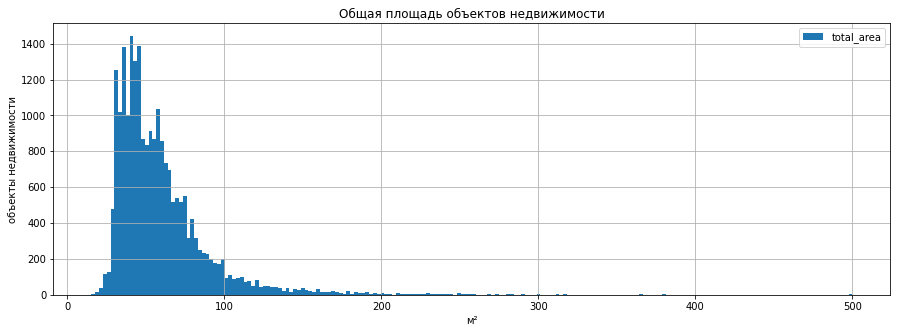

In [53]:
# Построим гистограмму площади
df['total_area'].hist(bins=200, figsize=(15, 5), legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Число квартир с площадью больше 250 м2: 69


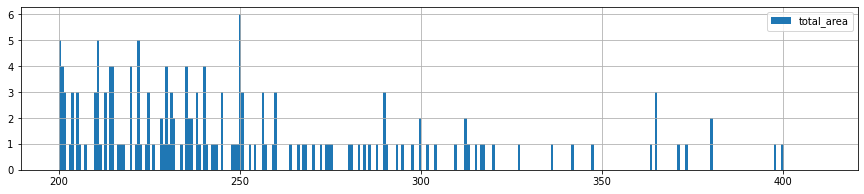

In [54]:
# Построим гистограмму числа квартир площадью больше 250 м2
df['total_area'].hist(bins=300, range=(200, 410), figsize=(15, 3), legend=True)
print('Число квартир с площадью больше 250 м2:', len(df.query('total_area > 250')))

In [55]:
# Удалим выбросы площади больше 250 м2
df = df.query('total_area <= 250')

Число квартир с площадью меньше 20 м2: 12


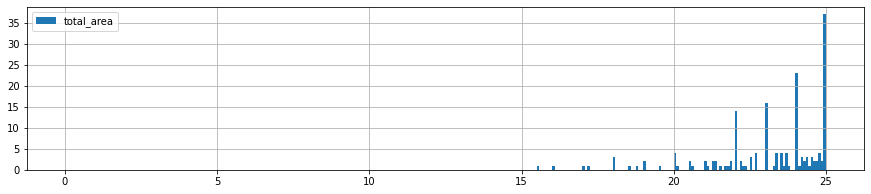

In [56]:
# Построим гистограмму числа квартир площадью меньше 20 м2
df['total_area'].hist(bins=300, range=(0, 25), figsize=(15, 3), legend=True)
print('Число квартир с площадью меньше 20 м2:', len(df.query('total_area < 20')))

In [57]:
# Удалим выбросы площади меньше 20 м2
df = df.query('total_area >= 20')

count   22,598.00
mean        58.89
std         28.46
min         20.00
25%         40.00
50%         52.00
75%         69.00
max        250.00
Name: total_area, dtype: float64

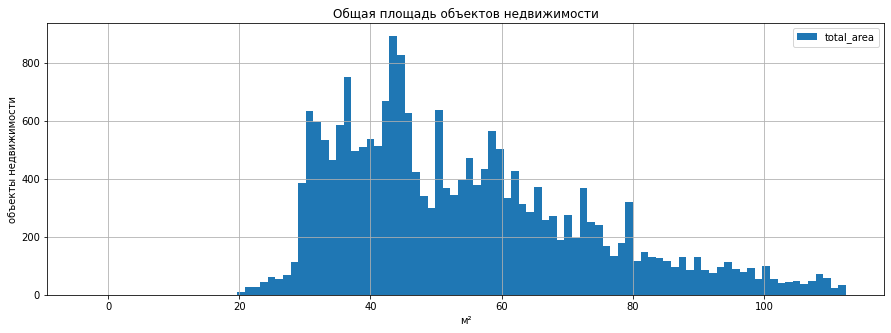

In [58]:
# Посмотрим описательную часть для этого столбца
display(df['total_area'].describe())

# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['total_area'].quantile(.25) # первый квартиль Q1
q3 = df['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади без выбросов
df['total_area'].hist(bins=100, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Средняя площадь объектов недвижимости составляет 59 м2, медиана - 52 м2, граница без выбросов - 120 м2. Большая часть объектов недвижимости имеют площадь от 30 до 62 м2. Далее от 62 до 80 м2 среднее количество объектов недвижимости. Наименьшее число объектов недвижимости в площадью менее 30 м2 и более 80 м2. 

##### Жилая площадь

count   22,598.00
mean        33.57
std         18.66
min          9.59
25%         18.60
50%         30.00
75%         42.00
max        184.00
Name: living_area, dtype: float64

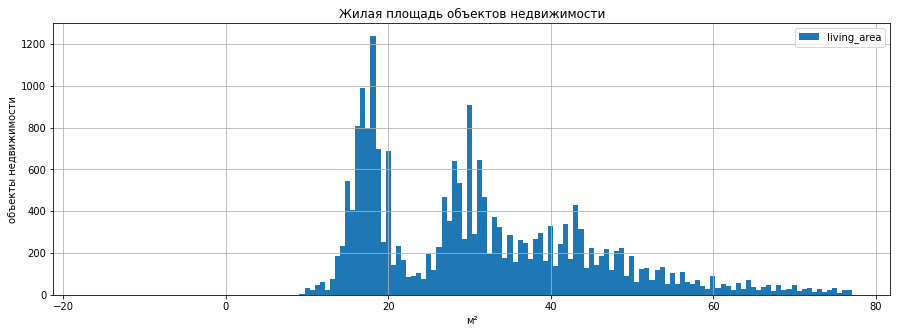

In [59]:
# Посмотрим описательную часть для этого столбца
display(df['living_area'].describe())

# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['living_area'].quantile(.25) # первый квартиль Q1
q3 = df['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму жилой площади без выбросов
df['living_area'].hist(bins=150, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Средняя жилой площади объектов недвижимости составляет 34 м2, медиана - 30 м2. Граница без выбросов - 80 м2. По гистограмме видим три распределенных по убываю всплеска на диапазонах от 15 до 20 м2, от 28 до 33 м2, от 40 до 45 м2. Посмотрим к квартирам со скольки комнатами соответствуют данные всплески. 

,living_area
rooms,
0,18.00
1,17.60
2,30.40
3,44.80
4,63.80
5,89.60
6,114.80
7,128.85
8,155.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '14')])

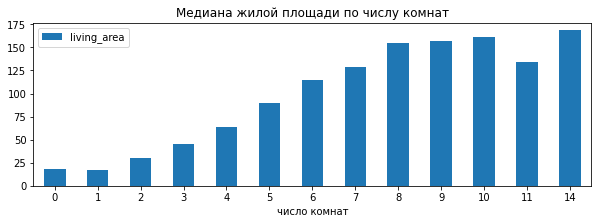

In [60]:
# Медиана жилой площади по числу комнат
df_lr = df.pivot_table(index='rooms', values='living_area', aggfunc='median')
display(df_lr)
df_lr.plot(kind='bar', figsize=(10, 3))
plt.title('Медиана жилой площади по числу комнат')
plt.xlabel('число комнат')
plt.xticks(rotation=0)

Убеждаемся, что каждый всплеск на гистограмме соответствует одно-, двух- и трехкомнатным квартирам соответсвенно. Медиана жилой площади однокомнатных квартир составляет 17,6 м3, двухкомнатных квартир - 30,4 м2, трехкомнатных квартир - 44,8 м2.

In [61]:
df.shape[0]

22598

##### Площадь кухни

count   22,598.00
mean        10.16
std          4.90
min          0.00
25%          7.00
50%          9.00
75%         11.56
max         50.00
Name: kitchen_area, dtype: float64

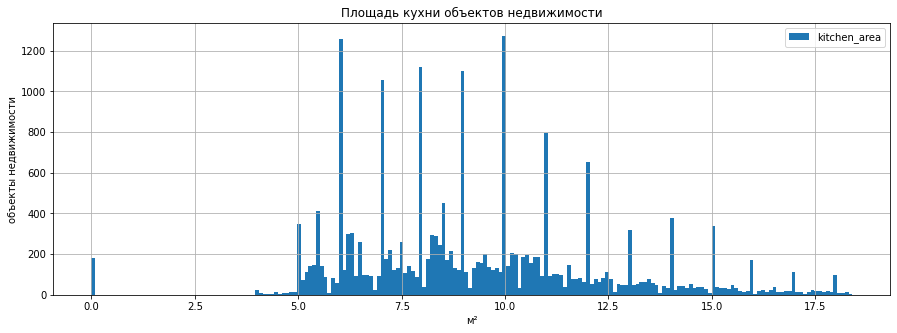

In [62]:
# Посмотрим описательную часть для этого столбца
display(df['kitchen_area'].describe())

# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = df['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади кухни без выбросов
df['kitchen_area'].hist(bins=200, range=(0, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Медиана площади кухни составляет 9 м2, средняя - 10.16 м2.

##### Цена объекта

In [63]:
# Посмотрим описательную часть для этого столбца
df['last_price'].describe()

count        22,598.00
mean      6,133,791.17
std       6,694,122.90
min          12,190.00
25%       3,450,000.00
50%       4,620,000.00
75%       6,700,000.00
max     330,000,000.00
Name: last_price, dtype: float64

Минимальная цена объектов нидвижимости составляет 12,190, посмотрим квартиры дешевле 500000.

In [64]:
# Посмотрим квартиры дешевле 500000
df[df['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
4889,7,450000,42.00,2017-07-31,2,2.62,1,23.00,1,False,False,False,5.80,0,поселок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233,"10,714.29",0,7,2017,первый,NaN
7569,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8,111.83,2,3,2019,последний,9.00
9267,3,490000,29.10,2016-05-05,1,2.50,5,17.00,5,False,False,False,5.50,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719,"16,838.49",3,5,2016,последний,NaN
14991,7,430000,30.40,2019-04-22,1,2.50,2,16.00,1,False,False,False,6.00,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,0,"14,144.74",0,4,2019,первый,NaN
20108,11,470000,44.50,2018-07-02,2,2.50,2,28.00,2,False,False,False,7.50,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298,"10,561.80",0,7,2018,последний,NaN
22058,8,480000,32.00,2019-01-06,1,2.50,2,16.00,1,False,False,False,7.96,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83,"15,000.00",6,1,2019,первый,NaN
22087,14,450000,38.50,2018-07-11,2,2.65,2,22.08,1,False,False,False,6.32,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45,"11,688.31",2,7,2018,первый,NaN
22737,0,470000,37.00,2018-02-18,1,2.60,3,17.74,3,False,False,False,9.20,0,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45,"12,702.70",6,2,2018,последний,NaN


Имеем одно объявление со стоимостью 12190. Очевидно владелец объявления допустил ошибку при заполнении, стоимость недвижимости площадью 108 м2 вероятее всего могла бы составлять 12190000, исправим запись.

In [65]:
df['last_price'] = df['last_price'].replace(12190, 12190000, regex=True)

In [66]:
# Посмотрим квартиры со стоимостью квадратного метра меньше 10000 руб
df.query('price_one_square_meter < 10000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
3784,9,500000,52.00,2018-08-02,2,2.70,2,31.00,1,False,False,False,8.00,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,110,"9,615.38",3,8,2018,первый,NaN
7569,7,12190000,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8,111.83,2,3,2019,последний,9.00


In [67]:
# Проверим медиану стоимости квадратного метра  квартир по населенному пункту Сланцы
df_loc = df.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc='median')
df_loc.query('locality_name == "Сланцы"')

,price_one_square_meter
locality_name,
Сланцы,"18,292.68"


In [68]:
# Удаляем квартиры со стоимостью квадратного метра меньше 10000 руб
df = df.query('price_one_square_meter >= 10000')

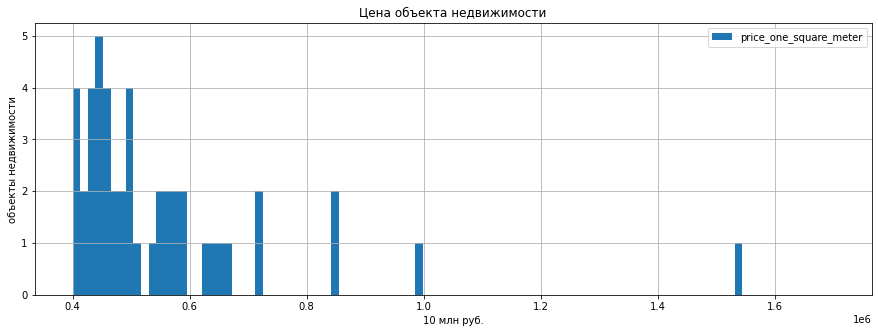

In [69]:
# Посмотрим число квартир со стоимостью квадратного метра больше 600000 руб
df['locality_name'].value_counts()
df['price_one_square_meter'].hist(bins=100, range=(400000, 1700000), figsize=(15, 5), legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

In [70]:
# Удаляем квартиры со стоимостью квадратного метра больше 600000 руб
df = df.query('price_one_square_meter <= 600000')

Построим гистограмму без выбросов.

count        22,585.00
mean      6,076,925.63
std       5,761,057.11
min         430,000.00
25%       3,450,000.00
50%       4,600,006.00
75%       6,700,000.00
max     140,000,000.00
Name: last_price, dtype: float64

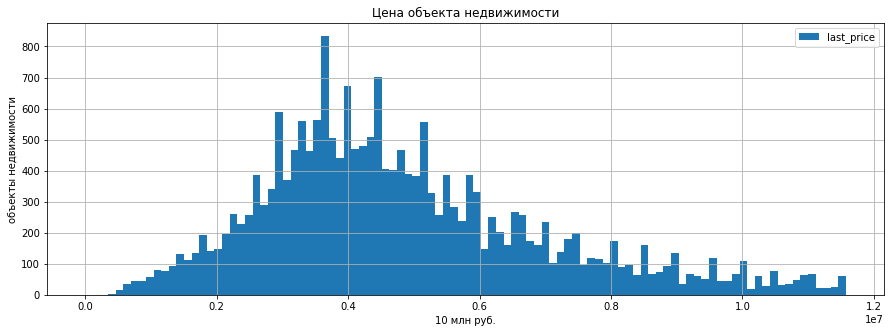

In [71]:
# Посмотрим описательную часть для этого столбца
display(df['last_price'].describe())

# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['last_price'].quantile(.25) # первый квартиль Q1
q3 = df['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
df['last_price'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6 млн, медиана 4,6 млн.

##### Количество комнат

count   22,585.00
mean         2.05
std          1.03
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         14.00
Name: rooms, dtype: float64

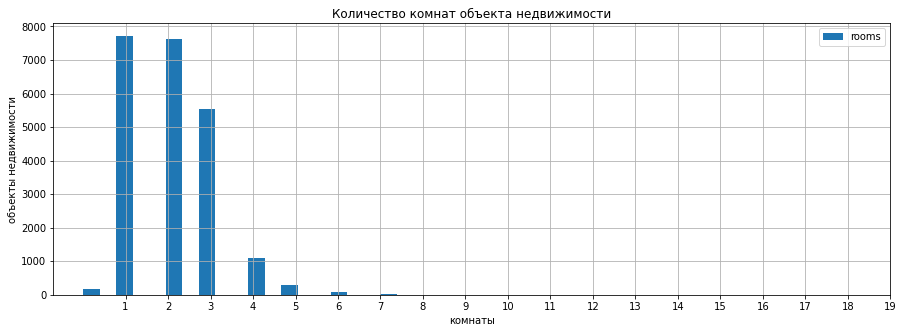

In [72]:
# Посмотрим описательную часть для этого столбца
display(df['rooms'].describe())

# Построим гистограмму количества комнат
df['rooms'].hist(bins=36, figsize=(15, 5), legend=True)
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.xticks(range(1, 20))
plt.show()

In [73]:
# Удалим квартиры с комнатами больше 7
df = df.query('rooms <= 7')

Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с количеством комнат 4-5 относительно немного. Среднее и медиана - 2 комнаты. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.

##### Высота потолков

2.70    7515
2.50    4069
2.60    2116
2.55    1514
2.75    1090
3.00    1048
2.80     976
2.65     743
2.64     268
3.20     262
Name: ceiling_height, dtype: int64

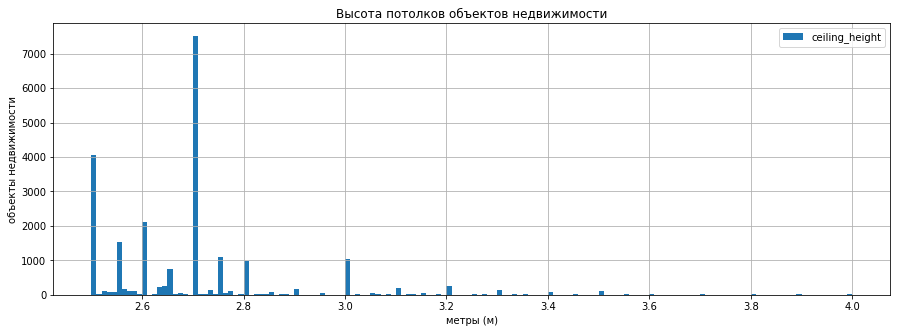

In [74]:
# Выведем распределение высоты потолков методом value_counts()
display(df['ceiling_height'].value_counts().head(10))

# Построим гистограмму высоты потолков
df['ceiling_height'].hist(bins=150, figsize=(15, 5), legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости имеют высоту потолков 2,7 м и 2,5 м. Реже представлены варианты от 2,55, 2,6, 2,65, 2,75, 2,8, 3 м. Средняя и медиана 2,7 м.

##### Тип этажа квартиры

In [75]:
# Посмотрим на количество в каждой категории
df.pivot_table(columns='floor_type', values='floor', aggfunc='count')

floor_type,другой,первый,последний
floor,16745,2738,3088


Меньше всего представлены объекты недвижимости на первом этаже, возможно это связано с тем, что часто первые этажи занимают под коммерческую деятельность. Посмотрим, какие этажи представлены в каждой категории. Объектов недвижимости на "другом" этаже примерно в 6 раз больше, чем на первом и на последнем этажах, это связано с многоэтажностью домов. Посммотрим сколько объектов недвижимости на каждом этаже данных категорий.

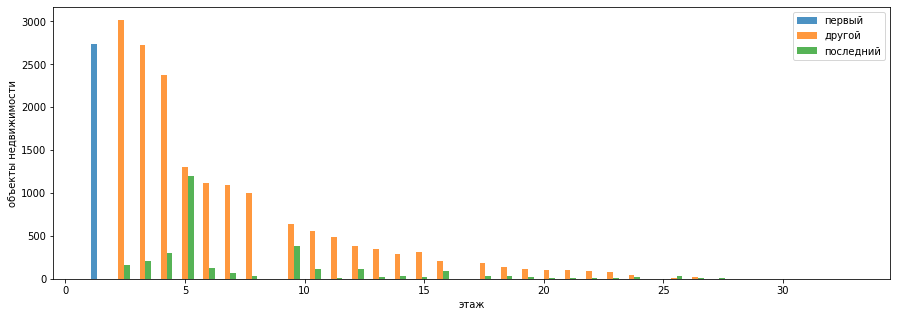

In [76]:
floor_first = df[df['floor_type'] == 'первый']['floor']
floor_another = df[df['floor_type'] == 'другой']['floor']
floor_top = df[df['floor_type'] == 'последний']['floor']

plt.figure(figsize=(15, 5))
plt.hist([floor_first, floor_another, floor_top], bins=36, alpha=0.8, label=['первый', 'другой', 'последний'])
plt.legend()
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

В категории "другой" этаж большая часть объектов недвижимости располагаются на 2, 3 и 4 этажах. Объявлений с объектами недвижимости на первой этаже представлено примерно столько же. Количество объявлений с объектами недвижимости на 5 этаже одинаково распределены в категориях "другой" и "последний", и в сумме приближаются к количеству объявлений на 1 - 4 этажах. Этажи от 6 и далее в категориях "другой" и "последний" представлены реже и в порядке убывания. 

##### Общее количество этажей в доме

In [77]:
# Посмотрим число квартир по этажности домов
df['floors_total'].value_counts().to_frame()

,floors_total
5,5485
9,3690
16,1340
12,1336
10,1153
4,1105
25,1046
6,824
17,816
3,595


In [78]:
# Удалим дома с этажами больше 26
df = df.query('floors_total <= 26')

count   22,360.00
mean        10.61
std          6.38
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         26.00
Name: floors_total, dtype: float64

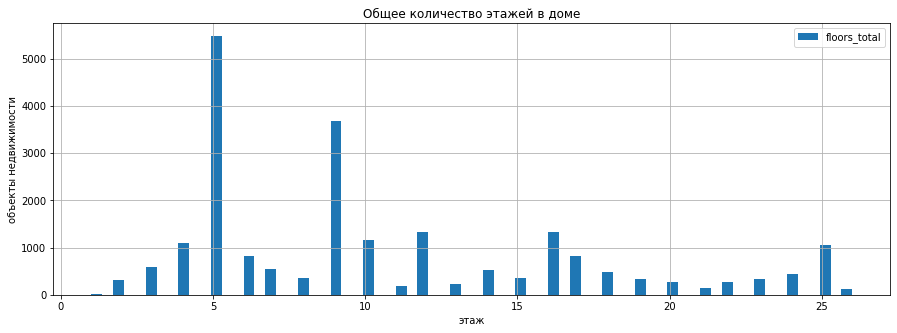

In [79]:
# Посмотрим описательную часть для этого столбца
display(df['floors_total'].describe())

# Построим обновленную гистограмму общего количества этажей в доме
df['floors_total'].hist(bins=70, figsize=(15, 5), legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Чаще всего представлены объекты недвижимости в 5-ти и 9-ти этажных домах, что соответсвует стандартоной застройке многоэтажных домов. Средняя - 10,6, медиана - 9.

##### Расстояние до центра города в метрах

count   17,252.00
mean    14,292.40
std      8,620.99
min        181.00
25%      9,439.00
50%     13,142.00
75%     16,275.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

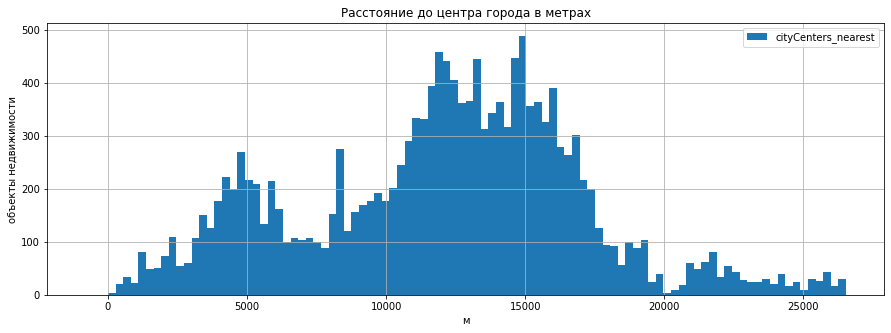

In [80]:
# Посмотрим описательную часть для этого столбца
display(df['cityCenters_nearest'].describe())

# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['cityCenters_nearest'].quantile(.25) # первый квартиль Q1
q3 = df['cityCenters_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму до центра города в метрах
df['cityCenters_nearest'].hist(bins=100, 
                               range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), 
                               figsize=(15, 5), legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Информация о расстоянии до центра города заполнена по 66% данных. Рассматриваемый диапазон от 0 до 27000 м, исключая выбросы. Большинство объектов недвижимости расположены на удалении 11-16 км от центра. Чуть меньшее количество объектов недвижимости расположены на удалении 4-6 км. Остальные варианты представлены реже. Средняя 14,3 км и медиана 13,1 км.

##### Расстояние до ближайшего парка

Посмотрим описательную часть для этого столбца и построим гистограмму без выбросов

count   7,645.00
mean      491.74
std       342.75
min         1.00
25%       288.00
50%       455.00
75%       613.00
max     3,190.00
Name: parks_nearest, dtype: float64

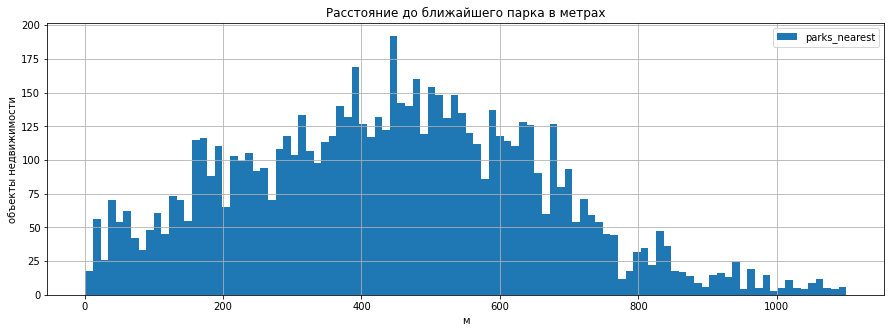

In [81]:
# Посмотрим описательную часть для этого столбца
display(df['parks_nearest'].describe())

# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = df['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
df['parks_nearest'].hist(bins=100, range=(1, (q3 + 1.5 * iqr)), figsize=(15, 5), legend=True)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Стоит упомянуть, что информация о расстоянии до ближайшего парка заполнена только по 29% данных. Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении 300-700 м от ближайшего парка. Средняя 490м и медиана 455м.

##### Как быстро продавались квартиры

Посмотрим описательную часть для этого столбца и построим гистограмму без выбросов

In [82]:
# Посмотрим описательную статистику столбца days_exposition без значений 0
df_exp_closed = df[df['days_exposition'] != 0]
display(df_exp_closed['days_exposition'].describe())

count   19,385.00
mean       180.68
std        220.02
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

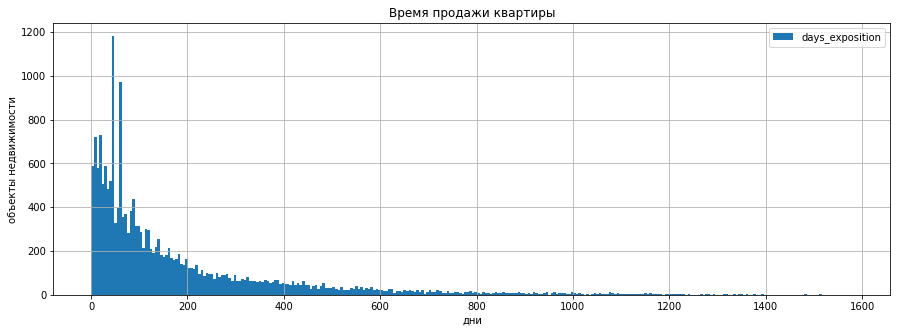

In [83]:
# Построим гистограмму времени продажи квартиры
df_exp_closed['days_exposition'].hist(bins=300, figsize=(15, 5), legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Средняя срока размещения объявления составляет 181 день, медиана 95 дней. Распределение находится в диапазоне от 1 до 1580 дней. На графике видны выбивающиеся значения около 50-60 дней, рассмотрим их в диапазоне до 100 дней и выведем распределение методом value_counts()

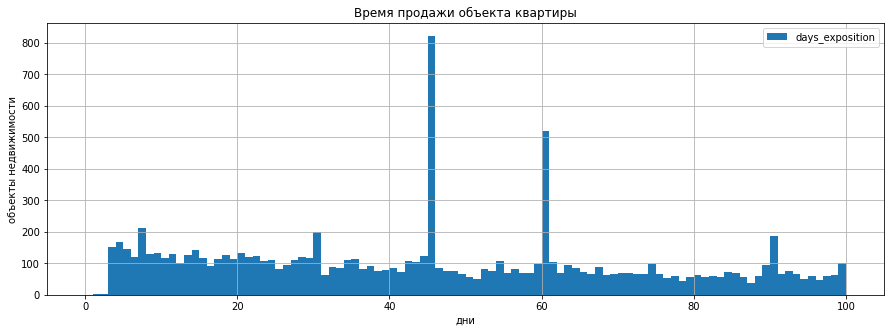

45    822
60    521
7     212
30    200
90    188
4     167
3     151
5     145
14    141
9     134
Name: days_exposition, dtype: int64

In [84]:
# Ограничим гистограмму периодом до 100 дней
df_exp_closed['days_exposition'].hist(bins=100, range=(0, 100), figsize=(15, 5), legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

df_exp_closed['days_exposition'].value_counts().head(10)

Выбивающиеся значения соответвуют значения 45, 60 дней. Данные аномалии связаны с тем, что сроки публикации без продления на яндексе соответсвуют этим дням. 
- Продажа квартиры: до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней

Удалим данные аномалии и посмотрим как изменится описательная статистика и гистограмма.

In [85]:
# # Посмотрим на число квартир со сроком размещения на продажу более 1200 дней
# df_norm_d['days_exposition'].hist(bins=200, range=(1000, 1580), figsize=(15, 5), legend=True)
# plt.title('Время продажи объекта квартиры')
# plt.xlabel('дни')
# plt.ylabel('объекты недвижимости')
# plt.show()
# print('Число квартир со сроком размещения на продажу более 1200 дней:', len(df.query('days_exposition > 1200')))

In [86]:
# Удалим записи с квартирами сроком размещения на продажу более 1200 дней
df = df.query('days_exposition <= 1200')

count   17,955.00
mean       184.83
std        211.03
min          1.00
25%         41.00
50%        106.00
75%        245.00
max      1,200.00
Name: days_exposition, dtype: float64

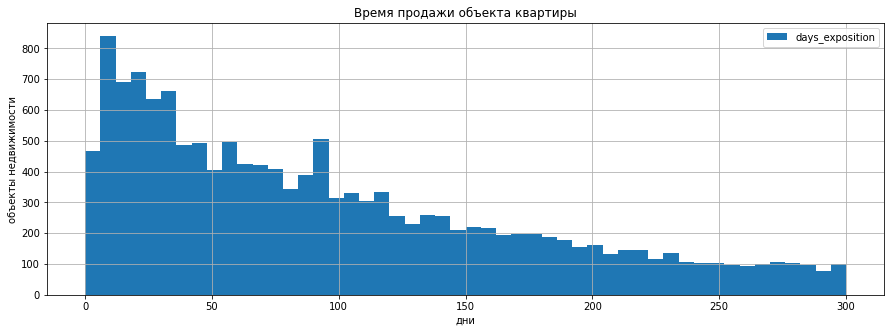

In [87]:
anomal_days = [45, 60]
df_exp_closed = df[df['days_exposition'] != 0]
df_norm_d = df_exp_closed[~df_exp_closed['days_exposition'].isin(anomal_days)]

display(df_norm_d['days_exposition'].describe())

df_norm_d['days_exposition'].hist(bins=50, range=(0, 300), figsize=(15, 5), legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

После удаления аномалий средняя стала 184 дня, медиана - 106 дней. Как видно из гистограммы без выбросов, число закрытия объявлений равномерно уменьшается в увеличением срока размещения объявлений.

In [88]:
# Посмотри число размещения объявлений по годам
df['exposition_year'].value_counts().to_frame()

,exposition_year
2018,8040
2017,7755
2019,2719
2016,2611
2015,1040
2014,108


За 2014 год в выборке всего 108 записей. Возможно, это всязано с тем, что в выборку попал не весь 2014 год и в начальные года выборки сервис Яндекс Недвижимости еще не был популярным. Уже в 2017-2018 число размещения объявлений составляло в 6 раз больше, чем в 2015 году. Удалим записи за 2014 из выборки, их недостаточно для сравнительного анализа.

In [89]:
df = df.query('exposition_year != 2014')

In [90]:
# Посмотрим медиану срока размещения квартир на продажу по года размещения
exp_year = df_norm_d.pivot_table(index='exposition_year', values='days_exposition', aggfunc=['median', 'count'])
exp_year

,median,count
,days_exposition,days_exposition
exposition_year,,
2014,762.00,90
2015,558.50,974
2016,253.00,2455
2017,113.00,7052
2018,74.00,6433
2019,21.00,951


In [91]:
# Число незакрытых объявлений по годам
on_sale = df.query('days_exposition == 0').pivot_table(index='exposition_year', 
                                                       values='days_exposition', 
                                                       aggfunc='count')
on_sale

,days_exposition
exposition_year,
2015,66
2016,64
2017,247
2018,887
2019,1693


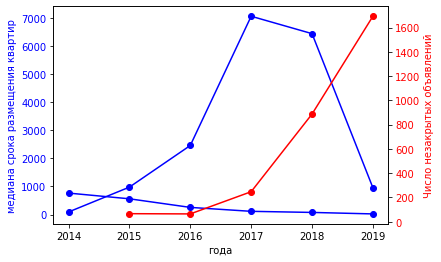

In [92]:
# Построим совмещенный график
fig, ax1 = plt.subplots()

ax1.plot(exp_year, color='b', marker='o')
ax1.set_xlabel('года')
ax1.set_ylabel('медиана срока размещения квартир', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(on_sale, color='r', marker='o')
ax2.set_ylabel('Число незакрытых объявлений', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()

С каждым годом, квартиры продавались в разы быстрее. При этом в 2019 году на момент выборки в два раза больше объявлений еще не были закрыты.

##### Вывод

**Рынок недвижимости Санкт-Петербурга и соседних населённых пунктов в большинстве представлен следующим образом: 1,2,3-х комнатные квартиры площадью 30 - 62 м2, с кухней 6 - 12 м2, высотой потолков 2,7 м, расположенные с первого по пятый этажах 5-ти или 9-ти этажного дома, стоимостью в пределах 3 - 5 млн. руб, находящиеся на удалении 11-16 км от центра и 300-650м от ближайшего парка.**

#### Факторы, влияющие на общую (полную) стоимость объекта недвижимости

Построим графики, которые показывают зависимость цены от параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - дата размещения (день недели, месяц, год).

Для начала посмотрим матрицу корреляции параметров total_area rooms, living_area, kitchen_area, rooms, exposition_year с параметром last_price.

In [93]:
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'exposition_year']

# Получаем матрицу корреляции
corr_matrix = df[corr_param].corr()
corr_matrix['last_price'].to_frame()

,last_price
last_price,1.00
total_area,0.74
living_area,0.65
kitchen_area,0.55
rooms,0.45
exposition_year,-0.03


Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше площадь квартиры, тем больше ее стоимость. Чуть слабее зависимость стоимости квартиры от жилой площади и площади кухни. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадью. Соответственно чем больше количество комнат, тем больше стоимость квартиры. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. Между стоимостью квартиры и годом размещения объявления отсутствует линейная связь.

Выведем диаграммы данных корреляций и рассмотрим характер их распределения.

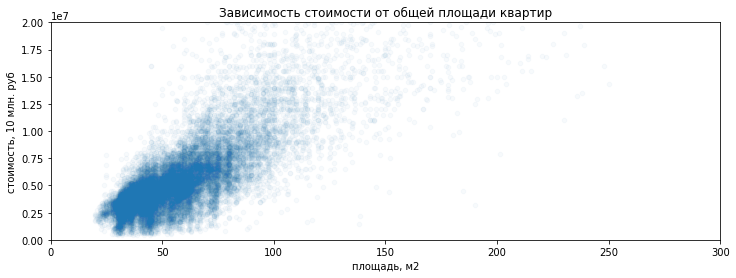

In [94]:
df.plot.scatter(x="total_area",
                    y="last_price",
                    alpha=0.03,
                    figsize=(12,4))
plt.ylim(0, 20000000)
plt.xlim(0, 300)
plt.title('Зависимость стоимости от общей площади квартир')
plt.xlabel('площадь, м2')
plt.ylabel('стоимость, 10 млн. руб')
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью от 2 до 7 млн. руб. и площадью от 30 до 65 м2. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена.

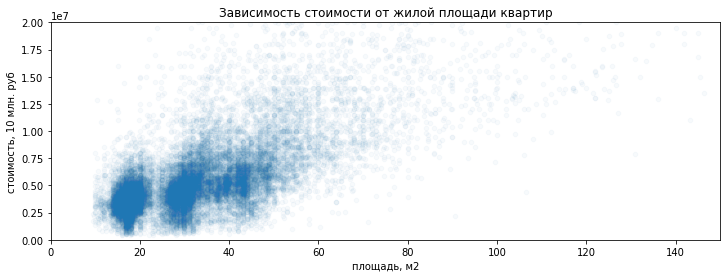

In [95]:
df.plot.scatter(x="living_area",
                    y="last_price",
                    alpha=0.03,
                    figsize=(12,4))
plt.ylim(0, 20000000)
plt.xlim(0, 150)
plt.title('Зависимость стоимости от жилой площади квартир')
plt.xlabel('площадь, м2')
plt.ylabel('стоимость, 10 млн. руб')
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 7 млн. руб. и жилой площадью 18 и 30 м2. Зависимость прямопропорциональная - чем больше жилая площадь квартиры, тем выше ее стоимость.

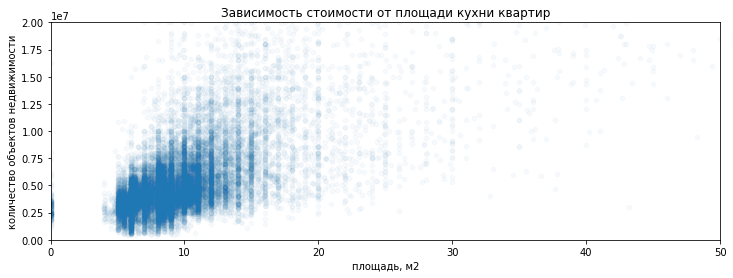

In [96]:
df.plot.scatter(x="kitchen_area",
                    y="last_price",
                    alpha=0.03,
                    figsize=(12,4))
plt.ylim(0, 20000000)
plt.xlim(0, 50)
plt.title('Зависимость стоимости от площади кухни квартир')
plt.xlabel('площадь, м2')
plt.ylabel('количество объектов недвижимости')
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 7 млн. руб. и площадью кухни от 6 до 12 м2. Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.

Коэффициент корреляции между числом комнат и площадью квартиры: 0.7904836600778036


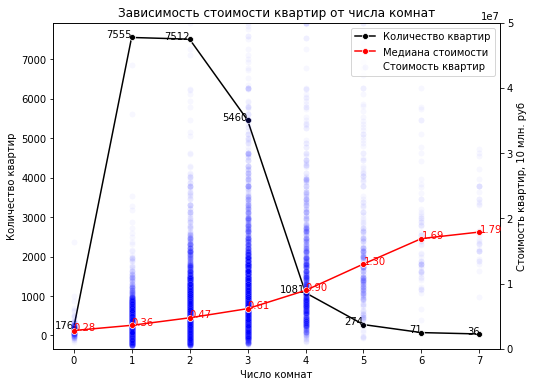

In [97]:
print('Коэффициент корреляции между числом комнат и площадью квартиры:', df['rooms'].corr(df['total_area']))

# Выведем диаграмму зависимости стоимости от числа комнат
df_rooms = df[df['rooms'] < 11]

# Создание фигуры и осей
fig, ax1 = plt.subplots(figsize=(8, 6))

# Плотность данных по числу комнат
room_counts = df_rooms['rooms'].value_counts().sort_index()

# Линейный график количества квартир по числу комнат
sns.lineplot(x=room_counts.index, y=room_counts.values, marker='o', color='black', ax=ax1)

# Подписи данных количества квартир
for index, value in room_counts.items():
    ax1.text(index, value, f'{value}', color='black', ha='right')

# Создание второго axes для графика количества квартир по числу комнат
ax2 = ax1.twinx()

# Диаграмма рассеяния стоимости квартир по числу комнат
sns.scatterplot(x='rooms', y='last_price', data=df_rooms, color='blue', ax=ax2, alpha=0.03)
plt.ylim(0, 50000000)

# Вычисление медианы для каждого года
median_prices = df_rooms.groupby('rooms')['last_price'].median().reset_index()

# Добавление линии медианы
sns.lineplot(x='rooms', y='last_price', data=median_prices, marker='o', color='red')

# Подписи данных медианы
for idx, row in median_prices.iterrows():
    plt.text(row['rooms'], row['last_price'], f'{row["last_price"]/10000000:.2f}', color='red')


# Настройки осей и заголовки
ax1.set_xlabel('Число комнат')
ax1.set_ylabel('Количество квартир')
ax2.set_ylabel('Стоимость квартир, 10 млн. руб')
ax1.set_title('Зависимость стоимости квартир от числа комнат')

# Показ легенды для обоих графиков
fig.legend(['Количество квартир', 'Медиана стоимости', 'Стоимость квартир'], 
           loc='upper right', bbox_to_anchor=(0.9, 0.88))

# Показать график
plt.show()

Из диаграммы видно, что больше всего данных для квартир стоимостью до от 1 млн. руб. до 20 млн. руб и количеством комнат от 1 до 3. Среди 4-х комнатных квартир редко встречаются объявления с стоимость ниже 4 млн. руб. С увеличением числа комнат стоимость квартир выше, а количество квартир меньше. Квартиры с комнатами больше 4 мало представлены на рынке продажи, т.к. большие объекты недвижимости маловостребованы. Число комнат и площадь квартиры имеют сильную связь, коэффициент корреляции составляет 0.76, что свидельствует о том, что с увеличением числа комнат площадь квартир соответственно больше.

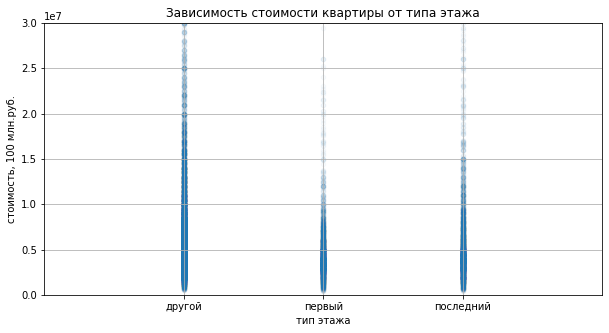

,median,mean
,last_price,last_price
floor_type,,
другой,4800000,"6,306,374.88"
первый,3950000,"4,688,316.15"
последний,4300000,"5,780,761.98"


(array([0, 1, 2]),
 [Text(0, 0, 'другой'), Text(1, 0, 'первый'), Text(2, 0, 'последний')])

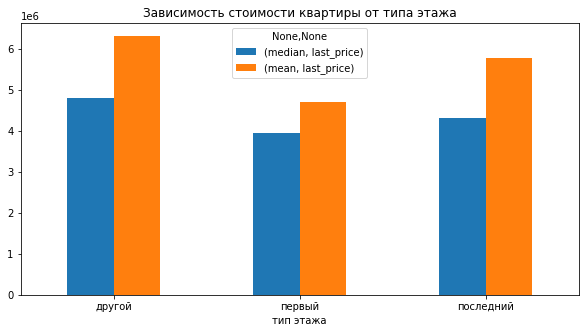

In [98]:
# Зависимость стоимости квартир от типа этажа
df.plot(kind = 'scatter', x = 'floor_type', y = 'last_price', 
            style='o', grid=True, figsize=(10, 5), alpha=0.03)
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('тип этажа')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 30000000)
plt.xlim(-1, 3)
plt.show()

# Средняя и медиана стоимости квартир в зависимости от типа этажа
df_fl_pr = df.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean'])
display(df_fl_pr)
df_fl_pr.plot(kind='bar', figsize=(10, 5))
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('тип этажа')
plt.xticks(rotation=0)

Первый этаж: стоимость большей части квартир варьируется в диапазоне 1 - 8 млн. руб.
Другой этаж: стоимость большей части квартир варьируется в диапазоне 1 - 15 млн. руб.
Последний этаж: стоимость большей части квартир варьируется в диапазоне 1 - 9,5 млн. руб.
На первом этаже квартиры относительно дешевле, чем на последнем этаже. На других этажах чаще встречаются квартиры дороже 10 млн. руб, но одинаково предствален и дешевый сегмент.
Медиана стоимости квартир на последнем этаже на 450 тыс. руб больше медианы стоимости квартин на первом этаже, медиана стоимости квартин на других этажаж больше стоимости на первом и последнем этажах на 800 и 300 тыс. руб соответственно. Средняя стоимости квартир на последнем этаже на 500 тыс. руб больше средней стоимости квартир на других этажах. Возможно это связано с тем, что на последних этажах располалгаются дорогой сегмент квартир-лофтов. 

,median
exposition_weekday,
1,4700000
2,4700000
0,4650000
3,4600000
4,4550000
6,4530000
5,4500000


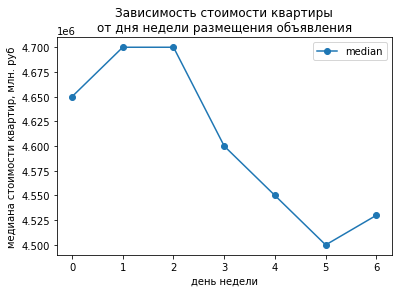

In [99]:
# Зависимость стоимости квартир от дня недели размещения объявления
pivot_table_weekday_exposition = df.pivot_table(index='exposition_weekday', 
                                                    values='last_price', 
                                                    aggfunc='median')
pivot_table_weekday_exposition.columns = ['median']
pivot_table_weekday_exposition.plot(marker='o')
plt.title('Зависимость стоимости квартиры\nот дня недели размещения объявления')
plt.xlabel('день недели')
plt.ylabel('медиана стоимости квартир, млн. руб')

pivot_table_weekday_exposition.sort_values('median', ascending=False)

В период с четверга по воскресенье квартиры размещаются на продажу с среднем на 100 - 200 тыс. руб дешевле.

,median
exposition_month,
4,4800000
9,4700000
2,4650000
3,4650000
11,4650000
7,4600000
8,4600000
12,4600000
1,4577500


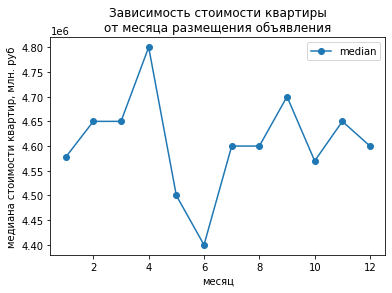

In [100]:
# Зависимость стоимости квартир от месяца размещения объявления
pivot_table_month_exposition = df.pivot_table(index='exposition_month', 
                                                  values='last_price', 
                                                  aggfunc=['median'])
pivot_table_month_exposition.columns = ['median']
pivot_table_month_exposition.plot(marker='o')
plt.title('Зависимость стоимости квартиры\nот месяца размещения объявления')
plt.xlabel('месяц')
plt.ylabel('медиана стоимости квартир, млн. руб')

pivot_table_month_exposition.sort_values('median', ascending=False)

В начале летнего сезона квартиры размещаются на продажу с среднем на 200 - 400 тыс. руб дешевле.

,count,median
exposition_year,,
2015,1040,5200000
2019,2719,5050000
2018,8040,4600000
2016,2611,4530000
2017,7755,4500000


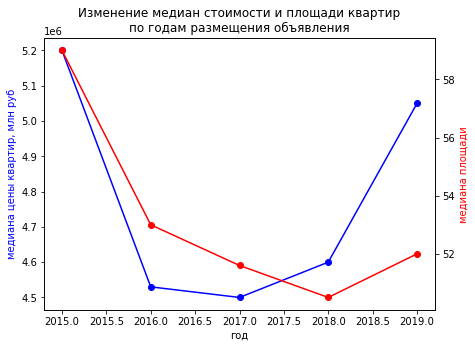

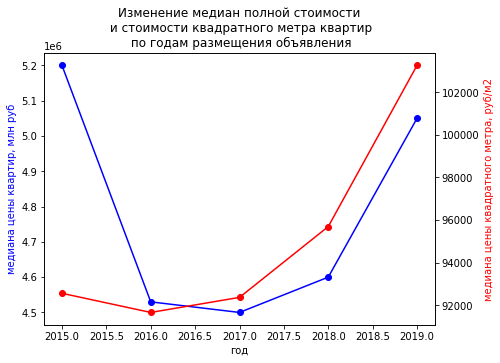

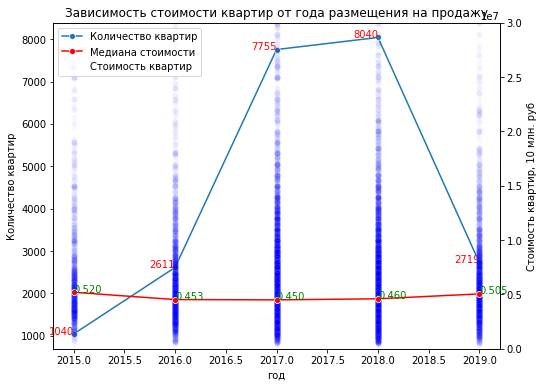

In [101]:
# Медиана стоимости квартир по годам размещения объявления
pivot_table_year_exposition = df.pivot_table(index='exposition_year', 
                                                 values='last_price', 
                                                 aggfunc=['count', 'median'])
pivot_table_year_exposition.columns = ['count', 'median']
display(pivot_table_year_exposition.sort_values('median', ascending=False))

#Зависимость медианы стоимости квартир и медианы площади квартир от года размещения объявления
df_year_med = df.pivot_table(index='exposition_year', values='last_price', aggfunc='median')
df_area_med = df.pivot_table(index='exposition_year', values='total_area', aggfunc='median')
fig, ax1 = plt.subplots(figsize=(7, 5))
ax2 = ax1.twinx()
ax1.plot(df_year_med, color='blue', marker='o')
ax2.plot(df_area_med, color='red', marker='o')
ax1.set_ylabel('медиана цены квартир, млн руб', color='blue')
ax2.set_ylabel('медиана площади', color='red')
ax1.set_xlabel('год')
plt.title('Изменение медиан стоимости и площади квартир\nпо годам размещения объявления')
plt.show()

#Зависимость медианы стоимости квартир и медианы цены квадратного метра от года размещения объявления
df_year_med = df.pivot_table(index='exposition_year', values='last_price', aggfunc='median')
df_area_med = df.pivot_table(index='exposition_year', values='price_one_square_meter', aggfunc='median')
fig, ax1 = plt.subplots(figsize=(7, 5))
ax2 = ax1.twinx()
ax1.plot(df_year_med, color='blue', marker='o')
ax2.plot(df_area_med, color='red', marker='o')
ax1.set_ylabel('медиана цены квартир, млн руб', color='blue')
ax2.set_ylabel('медиана цены квадратного метра, руб/м2', color='red')
ax1.set_xlabel('год')
plt.title('Изменение медиан полной стоимости\n и стоимости квадратного метра квартир\n по годам размещения объявления')
plt.show()

# Зависимость стоимости квартир от года размещения объявления
# Создание фигуры и осей
fig, ax1 = plt.subplots(figsize=(8, 6))
# Плотность данных по годам
obj_counts = df['exposition_year'].value_counts().sort_index()
# Линейный график количества квартир по годам
sns.lineplot(x=obj_counts.index, y=obj_counts.values, marker='o', ax=ax1)
# Подписи данных количества квартир
for index, value in obj_counts.items():
    ax1.text(index, value, f'{value}', color='red', ha='right')
# Создание второго axes для графика количества квартир по годам
ax2 = ax1.twinx()
# Диаграмма рассеяния стоимости квартир по годам
sns.scatterplot(x='exposition_year', y='last_price', data=df, color='blue', ax=ax2, alpha=0.03)
plt.ylim(0, 30000000)
# Вычисление медианы для каждого года
median_prices = df.groupby('exposition_year')['last_price'].median().reset_index()
# Добавление линии медианы
sns.lineplot(x='exposition_year', y='last_price', data=median_prices, marker='o', color='red')
# Подписи данных медианы
for idx, row in median_prices.iterrows():
    plt.text(row['exposition_year'], row['last_price'], f'{row["last_price"]/10000000:.3f}', color='green')
# Настройки осей и заголовки
ax1.set_xlabel('год')
ax1.set_ylabel('Количество квартир')
ax2.set_ylabel('Стоимость квартир, 10 млн. руб')
ax1.set_title('Зависимость стоимости квартир от года размещения на продажу')
# Показ легенды для обоих графиков
fig.legend(['Количество квартир', 'Медиана стоимости', 'Стоимость квартир'], 
           loc='upper right', bbox_to_anchor=(0.39, 0.88))
plt.show()

In [102]:
# Число квартир в Санкт-Петербурге погодам
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='locality_name', 
                                                           columns='exposition_year', 
                                                           values='rooms', 
                                                           aggfunc='count')

exposition_year,2015,2016,2017,2018,2019
locality_name,,,,,
Санкт-Петербург,742,1770,5262,5136,1896


In [103]:
# Число квартир с других населенных пунктах по годам
df.query('locality_name != "Санкт-Петербург"').pivot_table(columns='exposition_year', 
                                                           values='rooms', 
                                                           aggfunc='count')

exposition_year,2015,2016,2017,2018,2019
rooms,298,841,2493,2904,823


С 2016 года медиана стоимости квартир снизилась почти на 700 тыс. руб, в 2019 г медана стоимости выросла на 400 тыс. руб. При этом цена квадратного метра квартир росла все года, рост составил 14 тыс. руб/м2, а медиана площади квартир уменьшалась из года в год, число объявлений в 2016 году по сравнению с 2015 годом увеличилось в 2,5 раза раза, в 2017-2018 годах число объявлений из выборки составляет максимум. В 2019 году число объявлений примерно в 2,5 раза меньше чем в 2018 году, возможно это связано с тем, что выборка сделана до окончания 2019 года. Во все года квартир с периферии Санкт-Петербурга было размещено в 2 раза меньше, чем квартир с Санкт-Петербурга. Исходя из вышеперечисленных данных можно сделать вывод, что медиана стоимости квартир с 2016 года снижалась из-за размещения большого количества объявлений квартир малой площади. 

##### Вывод

**Наибольшая положительная линейная зависимость наблюдается между стоимостью квартиры и её площадью. Эта зависимость является прямо пропорциональной: чем выше стоимость квартиры, тем больше её площадь. Также положительная линейная зависимость имеется между стоимостью квартиры и количеством комнат, хотя она примерно в два раза слабее, чем зависимость с площадью. С увеличением количества комнат увеличивается стоимость квартиры. Слабая отрицательная линейная зависимость отмечается между стоимостью квартиры и расстоянием до центра города: квартира дороже, когда она ближе к центру. Хоть и между стоимостью квартиры и днем недели, месяцем размещения объявления линейная связь отсутствует, мы можем наблюдать, что в конце недели и в летний период квартиры рамещаются на продажу незначительно дешевле.**

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

,count,mean
locality_name,,
Санкт-Петербург,14806,"112,423.72"
Пушкин,347,"102,533.58"
Кудрово,456,"95,099.71"
поселок Парголово,264,"88,705.44"
Мурино,484,"85,734.87"
поселок Шушары,432,"78,553.33"
Колпино,328,"75,374.70"
Гатчина,300,"68,694.02"
Всеволожск,377,"67,078.82"


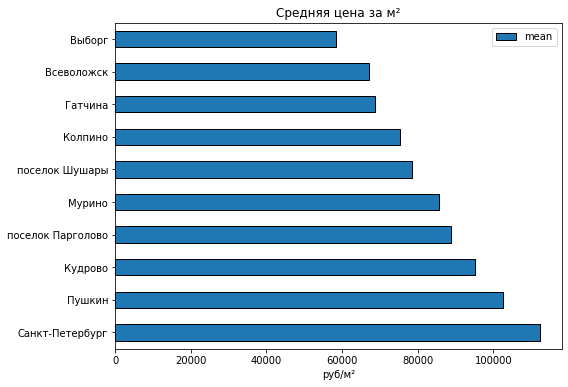

In [104]:
# Создадим сводную таблицу средней цены квадратного метра в топ 10 населенных пунктах
locality_pivot_table = df.pivot_table(index='locality_name', 
                                          values='price_one_square_meter', 
                                          aggfunc=['count', 'mean'])
locality_pivot_table.columns=['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending=False).head(10)
locality_pivot_table = locality_pivot_table.sort_values('mean', ascending=False)
display(locality_pivot_table)

# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах
locality_pivot_table['mean'].plot(kind='barh', legend=True, ec='black', figsize=(8, 6))
plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге (112423 руб.), что логично. Следом по стоимости идет Пушкин (102533 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге (58478 руб.).

**4.4 Средняя цена квартир в зависимости от расстояния до центра Санкт-Петербурга**

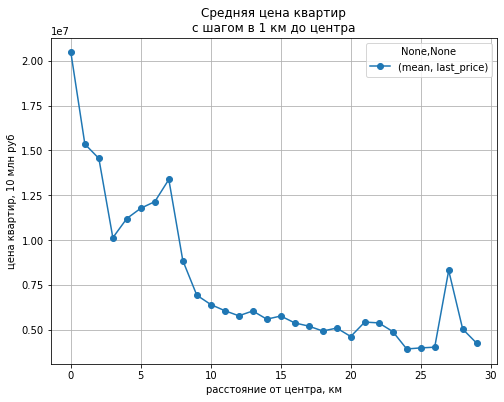

In [105]:
# Выберем квартиры в Санкт-Петербурге
df_spb = df.query('locality_name == "Санкт-Петербург"')

# Рассчитаем среднюю цену квартир в зависимости от расстояния до центра
(
    df_spb
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc=['mean'])
    .plot(marker='o', grid=True, figsize=(8, 6))
)
plt.title('Средняя цена квартир\nс шагом в 1 км до центра')
plt.xlabel('расстояние от центра, км')
plt.ylabel('цена квартир, 10 млн руб')
plt.show()

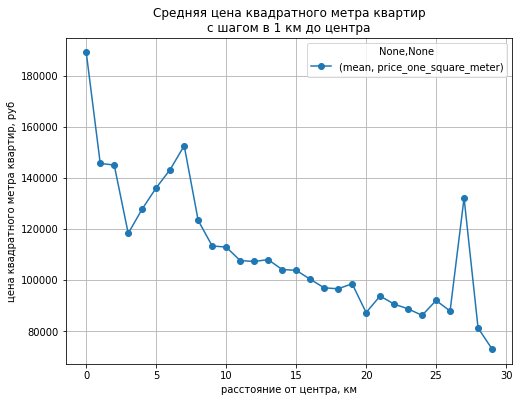

In [106]:
# Выберем квартиры в Санкт-Петербурге
df_spb_sq = df.query('locality_name == "Санкт-Петербург"')

# Рассчитаем среднюю цену квартир в зависимости от расстояния до центра
(
    df_spb_sq
    .pivot_table(index='city_centers_nearest_km', values='price_one_square_meter', aggfunc=['mean'])
    .plot(marker='o', grid=True, figsize=(8, 6))
)
plt.title('Средняя цена квадратного метра квартир\nс шагом в 1 км до центра')
plt.xlabel('расстояние от центра, км')
plt.ylabel('цена квадратного метра квартир, руб')
plt.show()

In [107]:
# Изучим характер выброса на 27 км
df_27km = df[df['city_centers_nearest_km'] == 27]
display(df_27km.head())
display(df_27km.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean']))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
99,2,7497600,62.50,2015-12-08,2,2.60,5,35.50,5,False,False,False,9.50,0,Пушкин,"14,517.00","26,670.00",1.00,517.00,0.00,NaN,1048,"119,961.60",1,12,2015,последний,27.00
127,8,16912000,105.70,2016-12-09,2,2.70,3,48.40,1,False,False,False,15.40,0,Пушкин,"14,352.00","26,506.00",3.00,366.00,3.00,179.00,390,"160,000.00",4,12,2016,первый,27.00
387,9,8570000,72.00,2018-08-11,3,3.00,6,42.00,4,False,False,False,10.00,0,Пушкин,"14,691.00","26,845.00",0.00,NaN,0.00,NaN,149,"119,027.78",5,8,2018,другой,27.00
484,0,3500000,28.50,2018-06-06,1,2.50,5,16.00,4,False,False,False,5.00,1,Пушкин,"14,852.00","27,006.00",0.00,NaN,0.00,NaN,86,"122,807.02",2,6,2018,другой,27.00
486,13,4500000,65.50,2017-10-27,3,2.60,10,42.00,7,False,False,False,8.00,2,поселок Металлострой,"25,531.00","27,243.00",0.00,NaN,0.00,NaN,32,"68,702.29",4,10,2017,другой,27.00


,count,mean
,last_price,last_price
locality_name,,
Красное Село,1,"3,000,000.00"
Пушкин,62,"6,837,235.48"
Санкт-Петербург,2,"8,300,000.00"
поселок Александровская,1,"3,750,000.00"
поселок Металлострой,30,"3,716,266.67"


In [108]:
# Изучим характер аномалии на от 3 км до 7 км:
df_km = df.query('3 <= city_centers_nearest_km <= 7').pivot_table(index='city_centers_nearest_km',
                                                         columns='floor_type',
                                                         values='floor',
                                                         aggfunc=['count', 'max'])
df_km

count                     max                 
floor_type              другой первый последний другой первый последний
city_centers_nearest_km                                                
3.00                       195     50        74      6      1        10
4.00                       460     67       101     23      1        25
5.00                       630     70       116     19      1        19
6.00                       417     63        78     15      1        15
7.00                       311     32        54     21      1        18

Средняя цена квартир на удалении от 11 до 30  км от центра примерно имеет линейное распределение и не сильно изменяется. По графику определяется резкий рост средней цены квартир в диапазоне 4-7 км от центра. При детальном изучении, данная аномалия объясняется тем, что на 3 км размещен старый малоэтажный фонд жилья, а начиная с 4 км фонд жилья представлен новыми постройками до 20 этажей. Так же, начиная с 4 км, количество жилья на "других" этажах в 3-4 раза больше чем количество жилья на первом и последнем этажах в сумме, что тоже влияет на среднюю стоимости жилья, так как жилье на "других" этажах в среднем стоит дороже. На  0 км от центра Санкт-Петербурга средняя цена квартир является максимальной - более 18 млн руб. На выброс средней стоимости до 8 млн. руб на 27 км влияет стоимость жилья в элитном коттеджном поселке Пушкин, расположенном на данном удалении от центра.

In [109]:
len(df)

22165

### Общий вывод

**Рынок недвижимости Санкт-Петербурга и соседних населённых пунктов в большей степени представлен квартирами:**

**- с 1-, 2- и 3-мя комнатами;**

**- площадью от 30 до 62 м²;**

**- с кухнями размером от 6 до 12 м²;**

**- высотой потолков 2,7 и 2,5 метра;**

**- расположены на первых пяти этажах пяти- или девятиэтажных домов;**

**- стоимость от 3 до 5 миллионов рублей;**

**- расположены на расстоянии 11-16 километров от центра города и в 300-600 метрах от ближайшего парка**

**Параметры, влияющие на стоимость квартиры:**

**- чем больше общая площадь квартиры, тем выше ее стоимость. Кроме того на стоимость влияют площадь жилой площади и площадь кухни;**

**- чем больше комнат, тем выше стоимость жилья, но данный параметр следует рассматривать в связке с площадью квартиры;**

**- квартиры на промежуточных этажах дороже квартир на первом и последнем этажах, на первом этаже самые дешевые квартиры;**

**- чем ближе квартира к центру, тем она дороже;**

**- в конце недели и в летний период квартиры размещаются на продажу незначительно дешевле**


**Так же установлено, что наибольшая средняя цена за квадратный метр в Санкт-Петербурге (112423 руб.), наименьшая цена за квадратный метр в Выборге (58478 руб.).**

**Средняя цены квадратного метра старом малоэтажном жилом фонде на 3км примерно на 30000 ниже, чем средняя цены квадратного метра жилья в новом многоэтажном жилом фонде на 7 км.**